# Milestone 1 - EDA and Preprocessing data 

# General Setup

In [1]:
!pip install numpy
!pip install pandas
!pip install Seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install notebook


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## importing Libraries 

In [2]:
import pandas as pd
# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.frame import DataFrame
from pandas import Series
import numpy as np
import datetime as dt 
import math 
from scipy import stats
from sklearn import preprocessing as pp
import requests
import csv
import os

# 1 - Extraction

## Defining a genral dataset Loading function

In [5]:
def extract_data(file_name):
    data_dir = "../Datasets/"
    return pd.read_csv(data_dir +file_name)

## Loading the dataset in a pandas dataframe

In [6]:
taxis_df = extract_data("green_tripdata_2019-08.csv")

# 2- EDA

## Checking the columns names and cleaning them (Removing spaces)

### Tidying up column names

In [119]:
def clean_column_names(df):
    print(df.columns)
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    print(df.columns)
clean_column_names(taxis_df)

Index(['Vendor', 'lpep pickup datetime', 'lpep dropoff datetime',
       'store and fwd flag', 'Rate type', 'PU Location', 'DO Location',
       'passenger count', 'trip distance', 'fare amount', 'extra', 'mta tax',
       'tip amount', 'tolls amount', 'ehail fee', 'improvement surcharge',
       'total amount', 'payment type', 'trip type', 'congestion surcharge'],
      dtype='object')
Index(['vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'rate_type', 'pu_location', 'do_location',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')


## Checking the general form of each data record

In [120]:
def get_head(df :DataFrame):
    return df.head()
get_head(taxis_df)

vendor lpep_pickup_datetime  \
0                      VeriFone Inc.  2019-08-01 00:22:12   
1                      VeriFone Inc.  2019-08-01 00:11:35   
2                      VeriFone Inc.  2019-08-01 00:56:09   
3                      VeriFone Inc.  2019-07-31 23:59:42   
4  Creative Mobile Technologies, LLC  2019-08-01 00:20:34   

  lpep_dropoff_datetime store_and_fwd_flag      rate_type  \
0   2019-08-01 00:22:38                  N  Standard rate   
1   2019-08-01 00:25:53                  N  Standard rate   
2   2019-08-01 01:12:02                  N  Standard rate   
3   2019-08-01 00:11:44                  N  Standard rate   
4   2019-08-01 00:28:44                  N  Standard rate   

                             pu_location  \
0  Queens,Long Island City/Hunters Point   
1            Brooklyn,DUMBO/Vinegar Hill   
2   Brooklyn,Downtown Brooklyn/MetroTech   
3                   Brooklyn,Boerum Hill   
4            Manhattan,East Harlem South   

                             do_location  passenger_count  trip_distance  \
0  Queens,Long Island City/Hunters Point              1.0           0.00   
1                  Brooklyn,Clinton Hill              5.0           2.55   
2                 Manhattan,East Chelsea              1.0           4.33   
3                    Brooklyn,Kensington              1.0           3.85   
4               Manhattan,Yorkville West              1.0           1.30   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0          2.5    NaN      0.5        0.00           0.0        NaN   
1         11.5   0.50      0.5        2.56           0.0        NaN   
2         15.5   0.50      0.5        2.00           0.0        NaN   
3         13.0   0.50      0.5        2.00           0.0        NaN   
4          7.5   3.25      0.5        1.00           0.0        NaN   

   improvement_surcharge  total_amount payment_type    trip_type  \
0                    0.3          3.30         Cash  Street-hail   
1                    0.3         15.36  Credit card  Street-hail   
2                    0.3         21.55  Credit card  Street-hail   
3                    0.3         16.30  Credit card  Street-hail   
4                    0.3         12.55  Credit card  Street-hail   

   congestion_surcharge  
0                  0.00  
1                  0.00  
2                  2.75  
3                  0.00  
4                  2.75

## General info about the dataset such as datatypes, column name and number null entries.

In [121]:
def get_info(df : DataFrame):
    return df.info()
get_info(taxis_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449709 entries, 0 to 449708
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   vendor                 449709 non-null  object 
 1   lpep_pickup_datetime   449709 non-null  object 
 2   lpep_dropoff_datetime  449709 non-null  object 
 3   store_and_fwd_flag     399287 non-null  object 
 4   rate_type              449709 non-null  object 
 5   pu_location            449709 non-null  object 
 6   do_location            449709 non-null  object 
 7   passenger_count        398321 non-null  float64
 8   trip_distance          449709 non-null  float64
 9   fare_amount            449709 non-null  float64
 10  extra                  241126 non-null  float64
 11  mta_tax                449709 non-null  float64
 12  tip_amount             449709 non-null  float64
 13  tolls_amount           449709 non-null  float64
 14  ehail_fee              82 non-null  

## Converting the pickup and dropoff times to proper date_time data type

In [122]:
def convert_date_time(df : DataFrame):
    df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
convert_date_time(taxis_df)

### Spiliting the pickup and drop off times to their components for easier manipulation 

In [123]:
def split_datetime_series(datetime_series: Series):
        date_series = datetime_series.dt.date
        time_series = datetime_series.dt.time
        hour_series = datetime_series.dt.hour
        day_series  = datetime_series.dt.day_name()
        return date_series, time_series, hour_series ,day_series

taxis_df["pickup_date"],taxis_df["pickup_time"],taxis_df["pickup_hour"],taxis_df["pickup_day"]   =split_datetime_series(taxis_df.lpep_pickup_datetime)
taxis_df["dropoff_date"],taxis_df["dropoff_time"],taxis_df["dropoff_hour"],taxis_df["dropoff_day"]   =split_datetime_series(taxis_df.lpep_dropoff_datetime)
get_head(taxis_df)

vendor lpep_pickup_datetime  \
0                      VeriFone Inc.  2019-08-01 00:22:12   
1                      VeriFone Inc.  2019-08-01 00:11:35   
2                      VeriFone Inc.  2019-08-01 00:56:09   
3                      VeriFone Inc.  2019-07-31 23:59:42   
4  Creative Mobile Technologies, LLC  2019-08-01 00:20:34   

  lpep_dropoff_datetime store_and_fwd_flag      rate_type  \
0   2019-08-01 00:22:38                  N  Standard rate   
1   2019-08-01 00:25:53                  N  Standard rate   
2   2019-08-01 01:12:02                  N  Standard rate   
3   2019-08-01 00:11:44                  N  Standard rate   
4   2019-08-01 00:28:44                  N  Standard rate   

                             pu_location  \
0  Queens,Long Island City/Hunters Point   
1            Brooklyn,DUMBO/Vinegar Hill   
2   Brooklyn,Downtown Brooklyn/MetroTech   
3                   Brooklyn,Boerum Hill   
4            Manhattan,East Harlem South   

                             do_location  passenger_count  trip_distance  \
0  Queens,Long Island City/Hunters Point              1.0           0.00   
1                  Brooklyn,Clinton Hill              5.0           2.55   
2                 Manhattan,East Chelsea              1.0           4.33   
3                    Brooklyn,Kensington              1.0           3.85   
4               Manhattan,Yorkville West              1.0           1.30   

   fare_amount  ...    trip_type  congestion_surcharge  pickup_date  \
0          2.5  ...  Street-hail                  0.00   2019-08-01   
1         11.5  ...  Street-hail                  0.00   2019-08-01   
2         15.5  ...  Street-hail                  2.75   2019-08-01   
3         13.0  ...  Street-hail                  0.00   2019-07-31   
4          7.5  ...  Street-hail                  2.75   2019-08-01   

   pickup_time  pickup_hour  pickup_day  dropoff_date dropoff_time  \
0     00:22:12            0    Thursday    2019-08-01     00:22:38   
1     00:11:35            0    Thursday    2019-08-01     00:25:53   
2     00:56:09            0    Thursday    2019-08-01     01:12:02   
3     23:59:42           23   Wednesday    2019-08-01     00:11:44   
4     00:20:34            0    Thursday    2019-08-01     00:28:44   

  dropoff_hour  dropoff_day  
0            0     Thursday  
1            0     Thursday  
2            1     Thursday  
3            0     Thursday  
4            0     Thursday  

[5 rows x 28 columns]

### Spiliting the pickup and drop off Locations to their components for easier manipulation 

In [124]:
def split_location_series(location_series: Series):
        Location_area = location_series.str.split(',').str[0]
        return Location_area
taxis_df["PU_area"] = split_location_series(taxis_df.pu_location)
taxis_df["DO_area"] = split_location_series(taxis_df.do_location)
get_head(taxis_df)

vendor lpep_pickup_datetime  \
0                      VeriFone Inc.  2019-08-01 00:22:12   
1                      VeriFone Inc.  2019-08-01 00:11:35   
2                      VeriFone Inc.  2019-08-01 00:56:09   
3                      VeriFone Inc.  2019-07-31 23:59:42   
4  Creative Mobile Technologies, LLC  2019-08-01 00:20:34   

  lpep_dropoff_datetime store_and_fwd_flag      rate_type  \
0   2019-08-01 00:22:38                  N  Standard rate   
1   2019-08-01 00:25:53                  N  Standard rate   
2   2019-08-01 01:12:02                  N  Standard rate   
3   2019-08-01 00:11:44                  N  Standard rate   
4   2019-08-01 00:28:44                  N  Standard rate   

                             pu_location  \
0  Queens,Long Island City/Hunters Point   
1            Brooklyn,DUMBO/Vinegar Hill   
2   Brooklyn,Downtown Brooklyn/MetroTech   
3                   Brooklyn,Boerum Hill   
4            Manhattan,East Harlem South   

                             do_location  passenger_count  trip_distance  \
0  Queens,Long Island City/Hunters Point              1.0           0.00   
1                  Brooklyn,Clinton Hill              5.0           2.55   
2                 Manhattan,East Chelsea              1.0           4.33   
3                    Brooklyn,Kensington              1.0           3.85   
4               Manhattan,Yorkville West              1.0           1.30   

   fare_amount  ...  pickup_date  pickup_time  pickup_hour  pickup_day  \
0          2.5  ...   2019-08-01     00:22:12            0    Thursday   
1         11.5  ...   2019-08-01     00:11:35            0    Thursday   
2         15.5  ...   2019-08-01     00:56:09            0    Thursday   
3         13.0  ...   2019-07-31     23:59:42           23   Wednesday   
4          7.5  ...   2019-08-01     00:20:34            0    Thursday   

   dropoff_date  dropoff_time  dropoff_hour dropoff_day    PU_area    DO_area  
0    2019-08-01      00:22:38             0    Thursday     Queens     Queens  
1    2019-08-01      00:25:53             0    Thursday   Brooklyn   Brooklyn  
2    2019-08-01      01:12:02             1    Thursday   Brooklyn  Manhattan  
3    2019-08-01      00:11:44             0    Thursday   Brooklyn   Brooklyn  
4    2019-08-01      00:28:44             0    Thursday  Manhattan  Manhattan  

[5 rows x 30 columns]

## General Stastics about the data to show anomalies in the columns

In [125]:
def describe_data(df:DataFrame):
    return df.describe(),df.describe(include=['object'])
describe_data(taxis_df)[0]

lpep_pickup_datetime          lpep_dropoff_datetime  \
count                         449709                         449709   
mean   2019-08-16 07:13:55.698514432  2019-08-16 07:35:19.128589568   
min              2009-01-01 00:40:29            2009-01-01 00:44:04   
25%              2019-08-08 12:31:06            2019-08-08 12:54:19   
50%              2019-08-16 11:00:00            2019-08-16 11:22:26   
75%              2019-08-24 00:51:38            2019-08-24 01:11:03   
max              2062-08-15 00:00:00            2062-08-15 16:34:10   
std                              NaN                            NaN   

       passenger_count  trip_distance    fare_amount          extra  \
count    398321.000000  449709.000000  449709.000000  241126.000000   
mean          1.311420       3.483319      15.140857       1.242265   
min           1.000000       0.000000    -350.000000      -4.500000   
25%           1.000000       1.100000       7.000000       0.500000   
50%           1.000000       2.060000      10.500000       1.000000   
75%           1.000000       4.180000      19.430000       1.000000   
max         555.000000     112.950000    1957.000000       8.250000   
std           1.997951       4.052729      13.636077       1.055755   

             mta_tax     tip_amount   tolls_amount  ehail_fee  \
count  449709.000000  449709.000000  449709.000000  82.000000   
mean        0.484617       0.989930       0.298717   0.023780   
min        -0.500000     -10.030000      -6.120000   0.000000   
25%         0.500000       0.000000       0.000000   0.000000   
50%         0.500000       0.000000       0.000000   0.000000   
75%         0.500000       1.560000       0.000000   0.000000   
max         3.550000     400.000000      51.620000   1.950000   
std         0.094812       2.185359       1.401804   0.215341   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          449709.000000  449709.000000         399287.000000   
mean                0.257747      18.183781              0.425234   
min                -0.300000    -350.000000             -2.750000   
25%                 0.300000       8.800000              0.000000   
50%                 0.300000      13.050000              0.000000   
75%                 0.300000      23.300000              0.000000   
max                 0.300000    1958.800000              2.750000   
std                 0.106712      15.208791              0.994323   

         pickup_hour   dropoff_hour  
count  449709.000000  449709.000000  
mean       13.776077      13.845462  
min         0.000000       0.000000  
25%        10.000000      10.000000  
50%        14.000000      15.000000  
75%        18.000000      18.000000  
max        23.000000      23.000000  
std         5.826758       5.903591

### Findings On numerical data
- lpep_pickup_datetime :
    - there is probably an outlier due to incorrect data @ 2009-01-01 00:40:29 and @ 2062-08-15 00:00:00
- lpep_dropoff_datetime :
    - there is probably an outlier due to incorrect data @ 2009-01-01 00:44:04 and @ 2062-08-15 16:34:10
- passanger_count :
    - missing values exist(need impuations)
    - The majority of the column seem to be valued 1 passenger 
    - there is probably an outlier due to incorrect data @ 555 passengers 
- trip_distance :
    - there seems to be some anomalies and outliers e.g :trip of 120 km 
- fare_amount :
    - there are some incorrect data (negative fairs)
    - outliers (2000$ trips)
- extra :
    - some incorrect data(-ve values)
- mta tax :
    - some incorrect data(-ve values)
- tip_amount :
    - some incorrect data(-ve values)
    - outliers (400$ tips)
- tolls_amount : 
    - some incorrect data(-ve values)
    - outliers (51.6 $)
- ehail_fee :
    - alot of missing values (almost empty)
- improvement_surcharge :
    - some incorrect data(-ve values)
- total_amount :
    - some incorrect data(-ve values)
    - outliers (2000$ trips)
- congestion_surcharge :
    - some incorrect data(-ve values & values other than 0 or 2.75)
    - missing values exist(need impuations)

In [126]:
describe_data(taxis_df)[1]

vendor store_and_fwd_flag      rate_type  \
count          449709             399287         449709   
unique              2                  2              7   
top     VeriFone Inc.                  N  Standard rate   
freq           384358             398056         387880   

                        pu_location                  do_location payment_type  \
count                        449709                       449709       438578   
unique                          251                          258            6   
top     Manhattan,East Harlem North  Manhattan,East Harlem North  Credit card   
freq                          36861                        17016       208526   

          trip_type pickup_date pickup_time pickup_day dropoff_date  \
count        449709      449709      449709     449709       449709   
unique            3          41       80245          7           40   
top     Street-hail  2019-08-02    16:03:00     Friday   2019-08-02   
freq         389521       16996         110      80194        16948   

       dropoff_time dropoff_day    PU_area    DO_area  
count        449709      449709     449709     449709  
unique        80162           7          7          7  
top        00:00:00      Friday  Manhattan  Manhattan  
freq            450       79866     152894     170251

### Findings On Non-numerical data
- vendor 
    - there is only two vendors avaliable with the majority being VeriFone Inc.
- PU-Location & DO-Location 
    - the most popular Location in the city to order a taxi from || to seems to be Manhattan,East Harlem North
- Payment type 
    - the most used payment is a credit card which can give an insight of the spending behaviour of the passengers 
- Trip type 
    - by far the most popular trip type is street haiö which indicates that most people didn't use mobile apps like uber to call cabs in the provided time period.

In [127]:
taxis_df.corr(numeric_only=True)

passenger_count  trip_distance  fare_amount     extra  \
passenger_count               1.000000       0.009583     0.004250 -0.008231   
trip_distance                 0.009583       1.000000     0.809532  0.462617   
fare_amount                   0.004250       0.809532     1.000000  0.512274   
extra                        -0.008231       0.462617     0.512274  1.000000   
mta_tax                      -0.008743       0.028567    -0.027878  0.085117   
tip_amount                    0.002185       0.170591     0.147042 -0.145347   
tolls_amount                  0.002114       0.499650     0.409699  0.256324   
ehail_fee                    -0.012346       0.113563     0.091718 -0.088113   
improvement_surcharge        -0.008151      -0.367754    -0.411646 -0.757555   
total_amount                  0.004568       0.825993     0.981288  0.520922   
congestion_surcharge          0.005537       0.243301     0.187376  0.410050   
pickup_hour                   0.001903      -0.060296    -0.052051 -0.154215   
dropoff_hour                  0.002306      -0.048693    -0.039133 -0.114253   

                        mta_tax  tip_amount  tolls_amount  ehail_fee  \
passenger_count       -0.008743    0.002185      0.002114  -0.012346   
trip_distance          0.028567    0.170591      0.499650   0.113563   
fare_amount           -0.027878    0.147042      0.409699   0.091718   
extra                  0.085117   -0.145347      0.256324  -0.088113   
mta_tax                1.000000   -0.015228     -0.006491        NaN   
tip_amount            -0.015228    1.000000      0.090432   0.095795   
tolls_amount          -0.006491    0.090432      1.000000        NaN   
ehail_fee                   NaN    0.095795           NaN   1.000000   
improvement_surcharge  0.458999    0.136931     -0.205408        NaN   
total_amount          -0.008607    0.297788      0.483739   0.102023   
congestion_surcharge   0.050704    0.287319      0.044054  -0.091184   
pickup_hour            0.026064    0.041156     -0.035570   0.087156   
dropoff_hour           0.027483    0.031904     -0.025503   0.084200   

                       improvement_surcharge  total_amount  \
passenger_count                    -0.008151      0.004568   
trip_distance                      -0.367754      0.825993   
fare_amount                        -0.411646      0.981288   
extra                              -0.757555      0.520922   
mta_tax                             0.458999     -0.008607   
tip_amount                          0.136931      0.297788   
tolls_amount                       -0.205408      0.483739   
ehail_fee                                NaN      0.102023   
improvement_surcharge               1.000000     -0.390509   
total_amount                       -0.390509      1.000000   
congestion_surcharge                0.050761      0.292299   
pickup_hour                         0.094875     -0.039362   
dropoff_hour                        0.077222     -0.027798   

                       congestion_surcharge  pickup_hour  dropoff_hour  
passenger_count                    0.005537     0.001903      0.002306  
trip_distance                      0.243301    -0.060296     -0.048693  
fare_amount                        0.187376    -0.052051     -0.039133  
extra                              0.410050    -0.154215     -0.114253  
mta_tax                            0.050704     0.026064      0.027483  
tip_amount                         0.287319     0.041156      0.031904  
tolls_amount                       0.044054    -0.035570     -0.025503  
ehail_fee                         -0.091184     0.087156      0.084200  
improvement_surcharge              0.050761     0.094875      0.077222  
total_amount                       0.292299    -0.039362     -0.027798  
congestion_surcharge               1.000000    -0.011762     -0.012088  
pickup_hour                       -0.011762     1.000000      0.935992  
dropoff_hour                      -0.012088     0.935992      1.000000

### Findings on correlations
- Tip Amount and Trip Distance: 
    - Tip amount has a moderate positive correlation (0.170591) with trip distance, indicating that passengers are more likely to tip more on longer trips.
- Tip Amount and Fare Amount: 
    - There is a moderate positive correlation (0.147042) between tip amount and fare amount, suggesting that higher fares may lead to larger tips.

# Questions

## 1. Is there a location where passenger take in average longer trips from ?

- Group by pickup area. 
- Calculate average distance for each group.
- Bar plot for each area and analyze. 

In [128]:
def plot_average_trip_distance(df :DataFrame):
    avg_distance_by_pickup = df.groupby('PU_area').trip_distance.mean()
    
    plt.figure(figsize=(20, 5))
    plt.bar(avg_distance_by_pickup.index, avg_distance_by_pickup, alpha=0.7)
    plt.locator_params(integer=True)
    plt.title('Average trip distance in New York major Areas')
    plt.xlabel('Area of Pickup')
    plt.ylabel('Average Trip Distance')
    plt.show()

C:\Users\karim wahdan\AppData\Local\Temp\ipykernel_14488\596475966.py:6: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(integer=True)


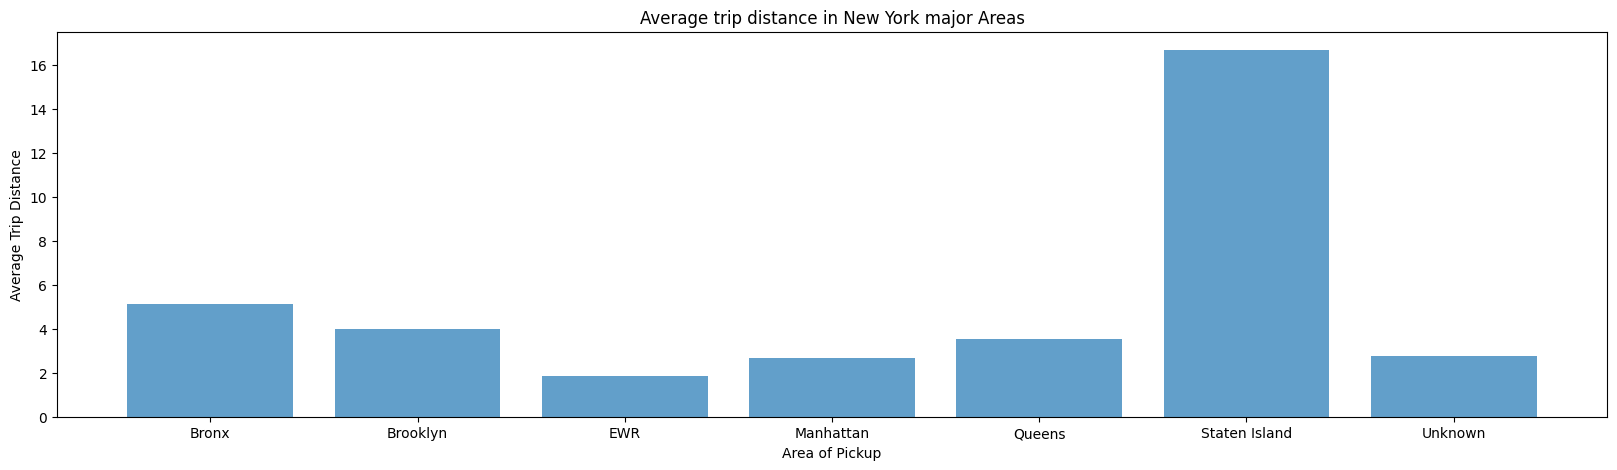

In [129]:
plot_average_trip_distance(taxis_df)

### Observation and question answer 
The bar plot distinctly illustrates that newyorkers starting their taxi trips from Staten Island

tend to take on significantly longer journeys compared to other starting points within the city.

_____

## 2. Do larger fare amounts typically result in larger tips? 

- A scatter plot is used to investigate the relationship between fare amounts and tip amounts, seeking to reveal any notable tipping trends
- Only Records paid with credit cards are considered as they might include tips, the fare and tips are clipped to reduce the effect of outliers

In [130]:
def plot_scatter(df:DataFrame, x_column, y_column, x_lower, x_upper, y_lower, y_upper, payment_type):
    df_clipped = df.copy()
    df_clipped[x_column] = df_clipped[x_column].clip(lower=x_lower, upper=x_upper)
    df_clipped[y_column] = df_clipped[y_column].clip(lower=y_lower, upper=y_upper)
    df_filtered = df_clipped[df_clipped['payment_type'] == payment_type]
    plt.figure(figsize=(20, 6))
    plt.scatter(df_filtered[x_column], df_filtered[y_column], alpha=0.7)
    plt.title(f'Scatter Plot of {x_column} to {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

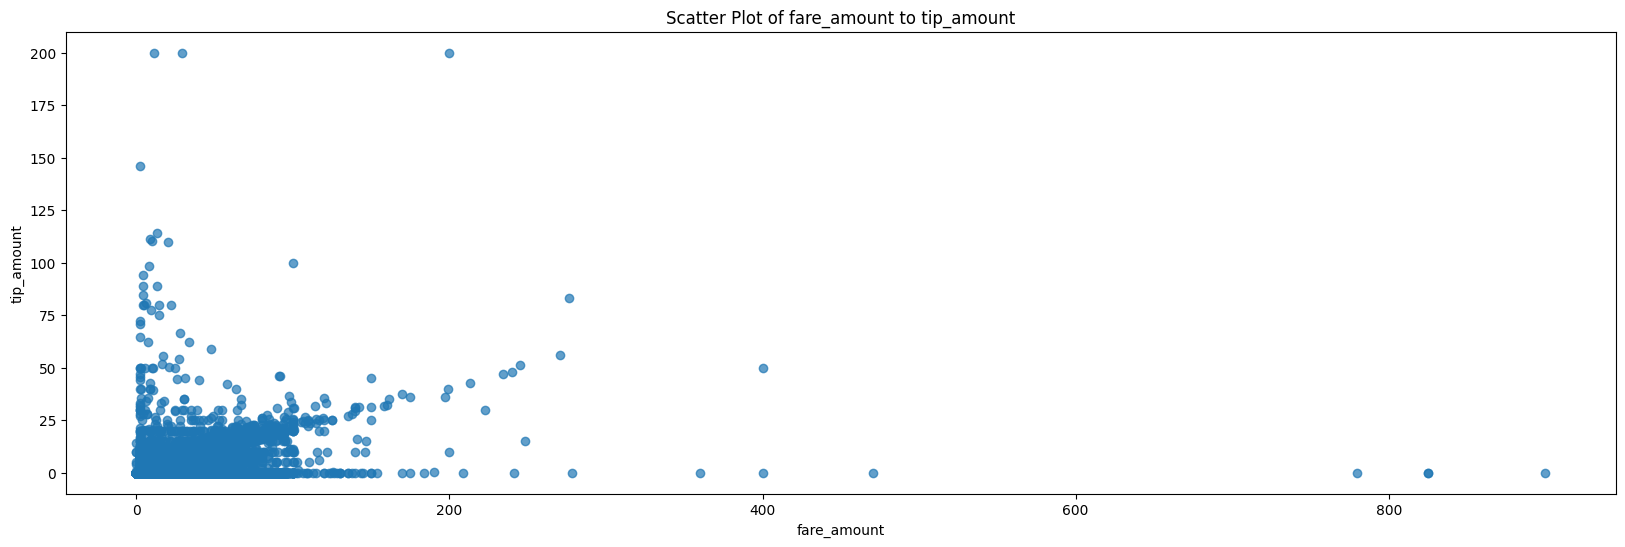

In [131]:
plot_scatter(taxis_df, 'fare_amount', 'tip_amount', 0, 1000, 0, 200, 'Credit card')

### Observations and question answer 
- The scatter plot reveals a modest correlation between fare and tip amounts, further supported by a calculated correlation coefficient of **0.147042**, indicating that in some cases a higher fare amount result in higher tip amount. 

_____

## 3. Do trips with larger passenger count have larger tip?

- A scatter plot is used to investigate the relationship between passenger counts and tip amounts, seeking to reveal any notable tipping trends
- Only Records paid with credit cards are considered as they might include tips, the fare and tips are clipped to reduce the effect of outliers.

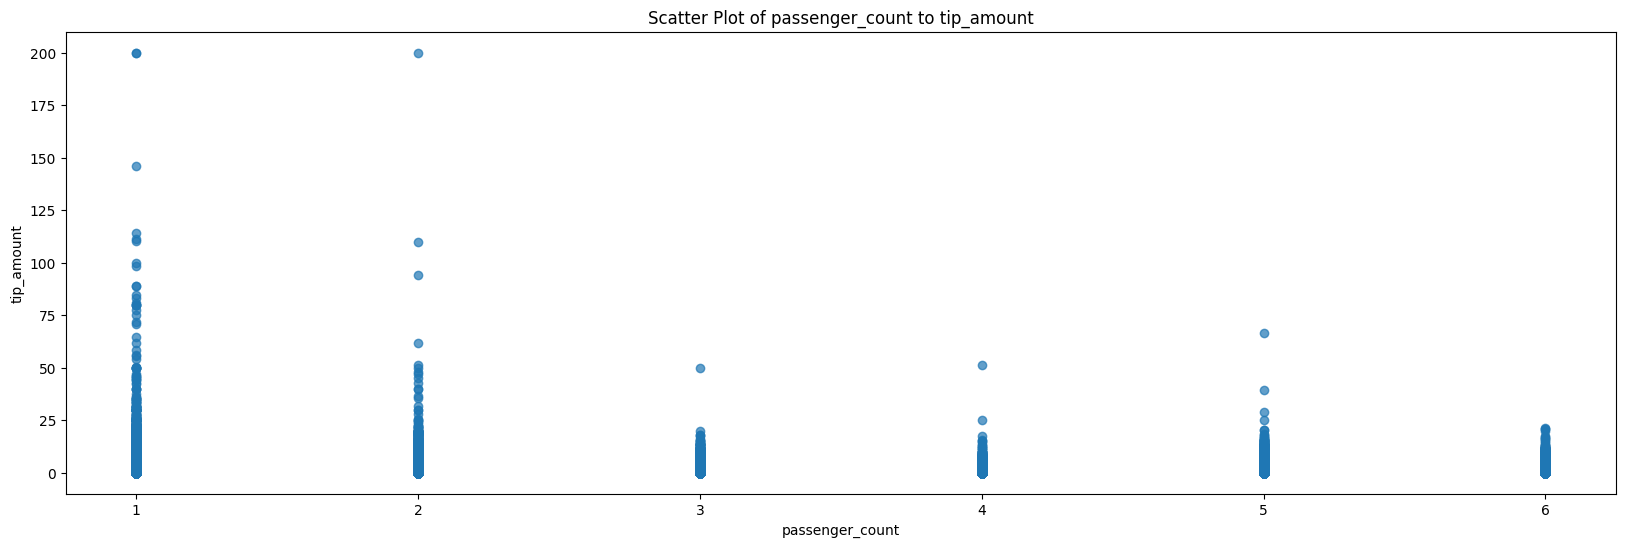

In [132]:
plot_scatter(taxis_df, 'passenger_count', 'tip_amount', 0, 6, 0, 200, 'Credit card')

### Observations and question answer 
- The scatter plot reveals a very modest correlation between passenger count and larger tip amounts, further supported by the calculated correlation coefficient of **0.002185**, indicating that in some cases having a lower passenger count result in higher tip amount. 

_____

## 4. Are there specific days of the week when tips tend to be higher?


- Group be day and get the average tip amount for each day 
- plot average tip per day and look for a possible trend

In [133]:
def plot_avg_tip_amount_per_weekday(df):
    df_clipped = df.copy()
    df_clipped['tip_amount'] = df_clipped['tip_amount'].clip(lower=0, upper=200)
    df_credit_card = df_clipped[(df_clipped['payment_type'] == "Credit card") & (df_clipped['tip_amount'] > 0)]
    avg_tip_per_da = df_credit_card.groupby('pickup_day')['tip_amount'].mean()
    print(avg_tip_per_da.head())
    plt.figure(figsize=(20, 5))
    plt.bar(avg_tip_per_da.index, avg_tip_per_da, alpha=0.7)
    plt.title('Average Tip Amount per Weekday')
    plt.xlabel('Day of Pickup')
    plt.ylabel('Average Tip Amount')
    plt.show()


pickup_day
Friday      2.942017
Monday      2.880365
Saturday    3.005254
Sunday      2.927968
Thursday    2.913531
Name: tip_amount, dtype: float64


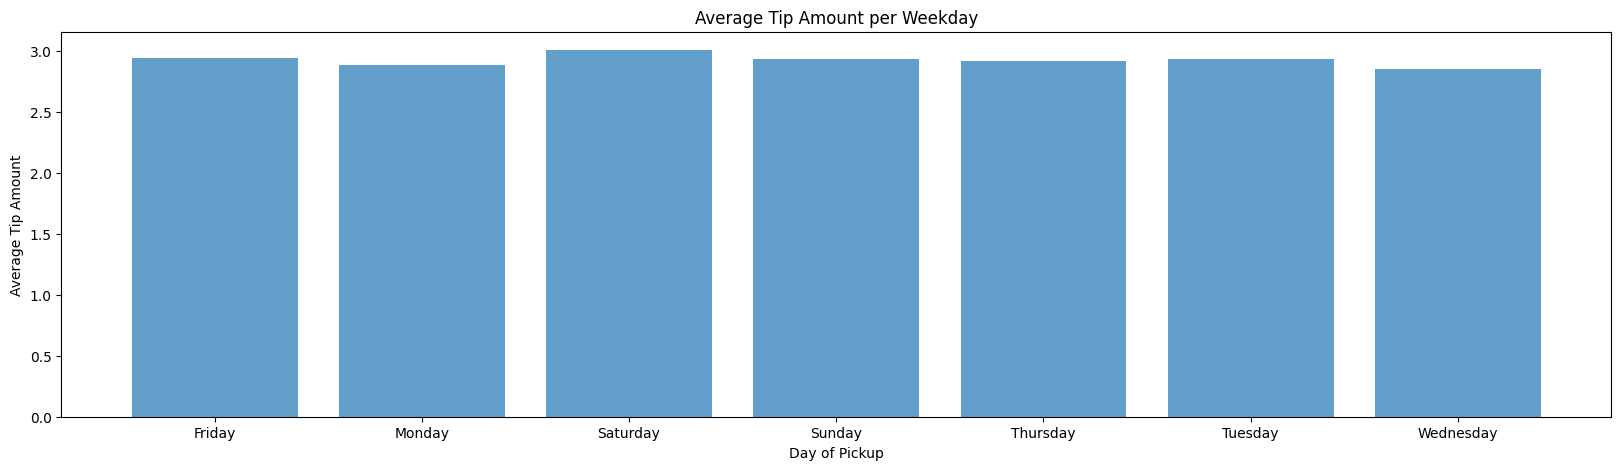

In [134]:
plot_avg_tip_amount_per_weekday(taxis_df)


### Observation and question answer 
The bar plot distinctly illustrates that passenger have no tendency to give a higher tip on average on any given day.



_____

## 5. Are there specific times of the day when the average trip distance is significantly higher or lower ?

- Group by pickup hour and get the average trip fare amount for each pick up hour
- plot average trip fare per pickup hour and look for a possible trend

In [135]:
def plot_avg_trip_distance_per_hour(df):
    df_clipped = df.copy()
    df_clipped['trip_distance'] = df_clipped['trip_distance'].clip(lower=0)
    avg_trip_distance_per_hour = df_clipped.groupby('pickup_hour')['trip_distance'].mean()

    plt.figure(figsize=(20, 5))
    bar_plot = plt.bar(avg_trip_distance_per_hour.index, avg_trip_distance_per_hour, alpha=0.7)
    plt.title('Average Trip Distance during the Day')
    plt.xlabel('Hour of Pickup')
    plt.ylabel('Average Trip Distance')
    plt.show()

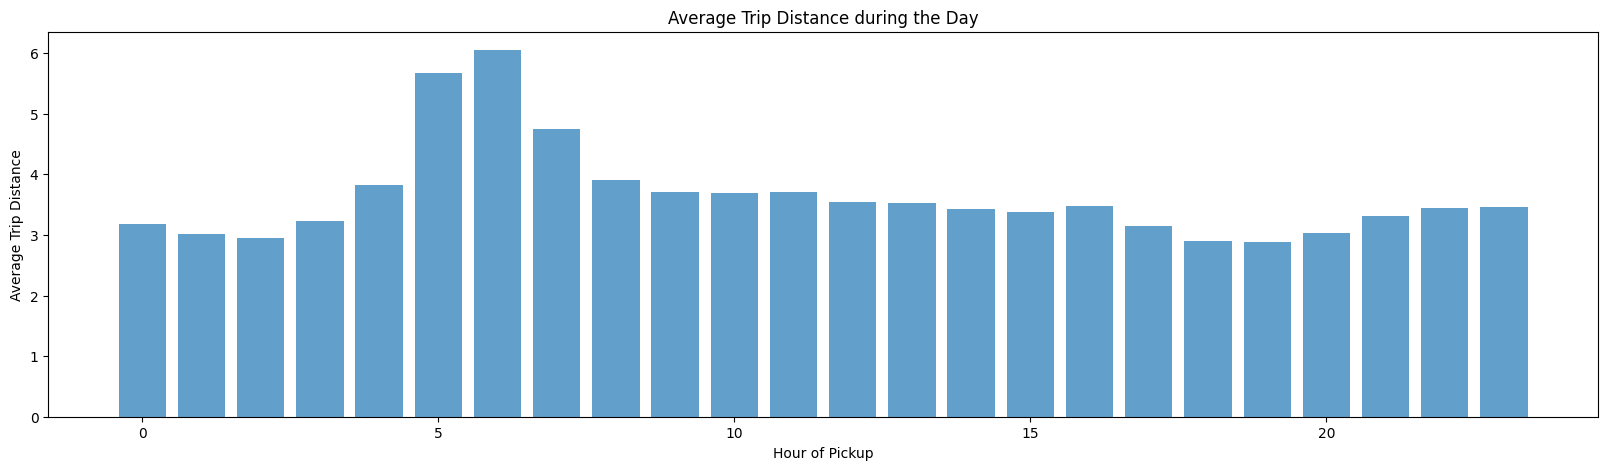

In [136]:
plot_avg_trip_distance_per_hour(taxis_df)


### Observation and question answer 
The bar plot distinctly illustrates that passengers have a tendency to get a longer trip between 4 PM and 8 PM, marking the end of the workday.

_____

## 6. Do some locations have higher payment by credit card or by cash than usual ?

- group by location
- count the number of trips per location
- count the number of payments by card per location
- count the number of payments be cash per location
- get ratio
- lot the ratios for each location in two bar plots 
- check for trend

In [137]:
def plot_payment_ratios_by_area(df):
    # Group by pickup area and calculate payment counts for credit card and cash
    pickup_area_group_counts = df.groupby(['PU_area']).size()
    payment_by_card = df[df['payment_type'] == "Credit card"].groupby('PU_area').size()
    payment_by_cash = df[df['payment_type'] == "Cash"].groupby('PU_area').size()

    # Calculate the ratio of payments by credit card and cash for each pickup area
    ratio_card_to_total_by_area = payment_by_card / pickup_area_group_counts
    ratio_cash_to_total_by_area = payment_by_cash / pickup_area_group_counts

    pickup_areas = ratio_card_to_total_by_area.index
    width = 0.4  # Width of each bar
    x_ticks = np.arange(len(pickup_areas))

    plt.figure(figsize=(12, 6))
    plt.bar(x_ticks - width/2, ratio_card_to_total_by_area, width, label='Credit Card Ratio', alpha=0.7)
    plt.bar(x_ticks + width/2, ratio_cash_to_total_by_area, width, label='Cash Ratio', alpha=0.7)
    plt.xlabel('Pickup Area')
    plt.ylabel('Ratio of Payments')
    plt.title('Payment Ratios by Pickup Area')
    plt.xticks(x_ticks, pickup_areas, rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

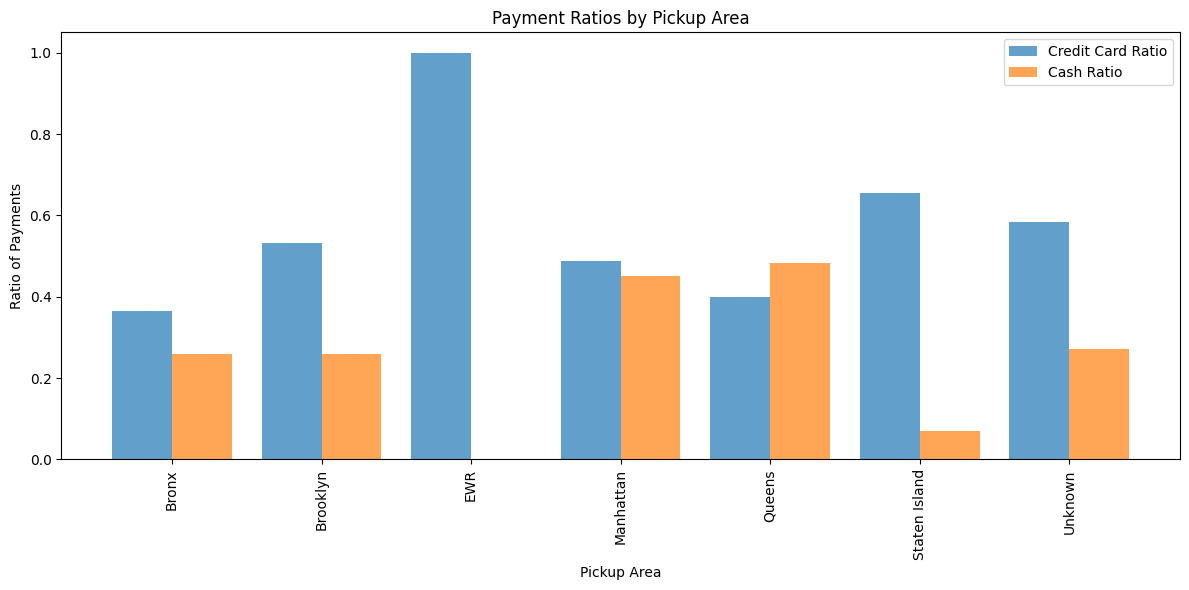

In [138]:
plot_payment_ratios_by_area(taxis_df)

### Observation and question answer 
- The bar plot distinctly illustrates that passengers taking Trips From EWR tend to always use Credit cards followed by Staten island.
- The bar plot distinctly illustrates that passengers taking Trips From Queens tend to use cash more than passengers from anyother area.

_____

# 3 - Cleaning Data

### Initializing lookup table 

In [139]:
LOOKUP = pd.DataFrame(columns=["column_name", "original_value", "encoded_value", "imputed_value"])
LOOKUP

Empty DataFrame
Columns: [column_name, original_value, encoded_value, imputed_value]
Index: []

## **Observe inconsistent data**

In [140]:
clean_df = taxis_df.copy()

## Detecting and handling duplicates

- Getting the number of whole record duplicates :
- removing the duplicates : 
    - two ways of detecting duplicates will be used either by considering the 
        - entire record 
        - 'vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'pu_location', 'do_location', 'trip_distance', 'passenger_count' 

In [141]:
def handle_duplicates(df: pd.DataFrame, subset=None):
    if subset is not None:
        duplicates_count = df.duplicated(subset=subset).sum()
    else:
        duplicates_count = df.duplicated().sum()
    df_no_duplicates = df.drop_duplicates(subset=subset)

    return df_no_duplicates, duplicates_count

clean_df_no_duplicates, duplicate_count = handle_duplicates(clean_df)
subset_columns = ['vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'pu_location', 'do_location', 'trip_distance', 'passenger_count']
clean_df_no_duplicates_2, duplicate_count_2 = handle_duplicates(clean_df,subset_columns)

print(f"the length of the datset before handling duplicates :{len(clean_df)}")
print(f"the length of the datset after handling duplicates :{len(clean_df_no_duplicates)} and number of duplicates removed:{duplicate_count}, considering the entire record")
print(f"the length of the datset after handling duplicates :{len(clean_df_no_duplicates_2)} and number of duplicates removed:{duplicate_count_2}, considering the set of features")
clean_df = clean_df_no_duplicates
len(clean_df)

the length of the datset before handling duplicates :449709
the length of the datset after handling duplicates :449700 and number of duplicates removed:9, considering the entire record
the length of the datset after handling duplicates :448391 and number of duplicates removed:1318, considering the set of features


449700

### Observations and findings
- It was chosen to detect duplicate records by considering the entire record, the decision was made due to the absence of unique identifiers of the trip or vechile or customer in the dataset, such as trip ID, taxi ID, or customer ID or vehicle_type which could have been used to uniquely identify if the same trip is recorded twice. It was noted that no subset of features provided a sufficient basis for unique identification for example two trips can have the  'vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'pu_location', 'do_location', 'trip_distance', 'passenger_count' and those two records wont be considered duplicates as two different drivers can have the identical trips but their meters calculte two totally different prices depending on the vehicle type , range and comfort level and vendor, so it was decided to use the whole record to avoid the risk of removal false duplicates.
- 9 unique duplicates were observed that were removed to eliminate redundancy.
_____

## Detecing and handling incorrect data

### Checking for any feature with inconsistent feature data type

In [142]:
def check_inconsistent_data_types(df:DataFrame):
    numeric_columns = df.select_dtypes(include=['object'])

    def unique_data_types(column):
        return column.apply(lambda x: type(x) if x is not None else None).unique()

    inconsistent_columns = numeric_columns.apply(unique_data_types).apply(lambda x: len(x) > 1)

    inconsistent_columns = inconsistent_columns[inconsistent_columns].index.tolist()

    if inconsistent_columns:
        print("Columns with inconsistent data types:")
        for column in inconsistent_columns:
            print(f"{column}: {unique_data_types(df[column])}")

    return inconsistent_columns
check_inconsistent_data_types(clean_df)

Columns with inconsistent data types:
store_and_fwd_flag: [<class 'str'> <class 'float'>]
payment_type: [<class 'str'> <class 'float'>]


['store_and_fwd_flag', 'payment_type']

#### Observations and findings
- It was observed from the output above that no numeric features have any data_type inconsistencies 
- Categorical features "store_and_fwd_flag" and "payment_type" contain float nan values, serving as placeholders for missing data, and are anticipated to be rectified in subsequent data processing stages.
__________________________________________________

### Checking for any incorrect data in the dataset numeric features

- **e.g.:** -ve values in the fare feature

#### Observations and finding
- The data desription [numeric description](#tag:numeric-description) before the removal of negative values show that 
    - fare_amount
    - extra
    - mta_tax
    - tip_amount
    - tolls_amount
    - improvement_surcharge 
    - total_amount 
    - congestion_surcharge
    all had negative values which is incorrect data according to the dataset description and little domain expertise, they all should be non-negative values indicating that they need to be replaced with a proper 
__________________________________________________

In [143]:
def replace_negative_with_absolute(df):
    numeric_columns = df.select_dtypes(include='number')
    df[numeric_columns.columns] = numeric_columns.applymap(np.abs)
    return df
replace_negative_with_absolute(clean_df)
describe_data(clean_df)[0]

lpep_pickup_datetime          lpep_dropoff_datetime  \
count                         449700                         449700   
mean   2019-08-16 07:13:49.430349568  2019-08-16 07:35:12.858994432   
min              2009-01-01 00:40:29            2009-01-01 00:44:04   
25%    2019-08-08 12:31:08.249999872     2019-08-08 12:54:20.500000   
50%              2019-08-16 11:00:00            2019-08-16 11:22:15   
75%    2019-08-24 00:51:01.249999872     2019-08-24 01:10:22.500000   
max              2062-08-15 00:00:00            2062-08-15 16:34:10   
std                              NaN                            NaN   

       passenger_count  trip_distance    fare_amount          extra  \
count    398312.000000  449700.000000  449700.000000  241122.000000   
mean          1.311427       3.483293      15.180773       1.246074   
min           1.000000       0.000000       0.000000       0.300000   
25%           1.000000       1.100000       7.000000       0.500000   
50%           1.000000       2.060000      10.500000       1.000000   
75%           1.000000       4.180000      19.500000       1.000000   
max         555.000000     112.950000    1957.000000       8.250000   
std           1.997973       4.052664      13.591204       1.051274   

             mta_tax     tip_amount   tolls_amount  ehail_fee  \
count  449700.000000  449700.000000  449700.000000  82.000000   
mean        0.487446       0.990046       0.298792   0.023780   
min         0.000000       0.000000       0.000000   0.000000   
25%         0.500000       0.000000       0.000000   0.000000   
50%         0.500000       0.000000       0.000000   0.000000   
75%         0.500000       1.560000       0.000000   0.000000   
max         3.550000     400.000000      51.620000   1.950000   
std         0.078994       2.185332       1.401776   0.215341   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          449700.000000  449700.000000         399278.000000   
mean                0.259402      18.230220              0.425353   
min                 0.000000       0.000000              0.000000   
25%                 0.300000       8.800000              0.000000   
50%                 0.300000      13.050000              0.000000   
75%                 0.300000      23.300000              0.000000   
max                 0.300000    1958.800000              2.750000   
std                 0.102621      15.152689              0.994266   

         pickup_hour   dropoff_hour  
count  449700.000000  449700.000000  
mean       13.776077      13.845459  
min         0.000000       0.000000  
25%        10.000000      10.000000  
50%        14.000000      15.000000  
75%        18.000000      18.000000  
max        23.000000      23.000000  
std         5.826726       5.903564

#### Handling Techinque Justifcation
- There are two viable approaches for addressing the presence of negative values within the numerical features as described above:

    1. Replacing the negative values with zeros.
    1. Inverting the negative aspect of these values to preserve their numerical representation for more comprehensive analysis. 

<br>
- Ultimately, it was decided that negating the negative values is the preferred course of action. This decision aligns with the objective of retaining the original numeric information and insights, as substituting negative values with zeros would entail a loss of data. Additionally, it's essential to acknowledge that the occurrence of negative values in these automated fields may stem from potential anomalies, such as software tracking errors or transmission bit flips, rather than inherent characteristics of the data itself. This approach ensures that data anomalies are addressed without compromising the integrity of the information for subsequent analysis.

_____

#### Handling incorrect Data in constant value features

In [144]:
def replace_non_zero_incorrect_values(series, value_to_replace):
    series.update(series.apply(lambda x: value_to_replace if (x != 0) and (not pd.isnull(x)) else x))

- Congestion surcharge

In [145]:
print(clean_df.congestion_surcharge.value_counts())
replace_non_zero_incorrect_values(clean_df.congestion_surcharge,2.75)
clean_df.congestion_surcharge.value_counts()

congestion_surcharge
0.00    337504
2.75     61632
2.50       137
0.75         5
Name: count, dtype: int64


congestion_surcharge
0.00    337504
2.75     61774
Name: count, dtype: int64

- mta_tax

In [146]:
print(clean_df.mta_tax.value_counts())
replace_non_zero_incorrect_values(clean_df.mta_tax,0.5)
clean_df.mta_tax.value_counts()

mta_tax
0.50    438373
0.00     11322
3.55         5
Name: count, dtype: int64


mta_tax
0.5    438378
0.0     11322
Name: count, dtype: int64

#### Handling Techinque Justifcation


- both the "mta_tax" and the "Congestion_surcharge" have distinct binary values either (0, 0.5 or 2.75) respectively 
<br>
- Ultimately, it was decided that negating the negative values is the preferred course of action. This decision aligns with the objective of retaining the original numeric information and insights, as substituting negative values with zeros would entail a loss of data. Additionally, it's essential to acknowledge that the occurrence of negative values in these automated fields may stem from potential anomalies, such as software tracking errors or transmission bit flips, rather than inherent characteristics of the data itself. This approach ensures that data anomalies are addressed without compromising the integrity of the information for subsequent analysis.

### Checking for any incorrect data in the dataset datatime features

In [147]:
def check_unique_datetime_values(df):
    datetime_columns = df.select_dtypes(include=['datetime64']).columns
    
    for col in datetime_columns:
        unique_values = df[col].dt.year.value_counts()
        print(f"Unique values for {col}:")
        for year, count in unique_values.items():
            print(f"Year {year}: {count} occurrences")
check_unique_datetime_values(clean_df)

Unique values for lpep_pickup_datetime:
Year 2019: 449683 occurrences
Year 2009: 11 occurrences
Year 2010: 5 occurrences
Year 2062: 1 occurrences
Unique values for lpep_dropoff_datetime:
Year 2019: 449683 occurrences
Year 2009: 11 occurrences
Year 2010: 5 occurrences
Year 2062: 1 occurrences


#### Observations and finding 
- Both of the datetime feature of the date set have incorrect values stored in them 
- the lpep_pickup_datetime has values for 2009,2010,2062 which all don't make sense given the time window of the dataset those values need to be manipluted or dropped to ensure the correctness of the data 
- some trips have their pickup time after their dropoff time 

In [148]:
# Define the plot_kde function
def plot_kde(series, title):
    plt.figure(figsize=(20, 6))
    sns.kdeplot(series, alpha=0.7)
    plt.title(f"Density of {title}")
    plt.show()

In [149]:
# Define a function to drops all datetime values aren't in the proper dataset time window
def filter_records_by_year_month(df, month, year):
    for col in df.select_dtypes(include=['datetime64']).columns:
        before_title = f"Before Ensuring {month},{year}- {col}"
        after_title = f"After Ensuring {month},{year} - {col}"
        mask = (df[col].dt.year == year) & (df[col].dt.month == month)
        plot_kde(df[col], before_title)
        df = df[mask]
        plot_kde(df[col], after_title)
    
    return df
# Define a function to ensure all datetime values are in the proper dataset time window
def ensure_proper_time_window(df,month,year):
    datetime_columns = df.select_dtypes(include=['datetime64']).columns
    
    for col in datetime_columns:
        before_title = f"Before Ensuring {month},{year}- {col}"
        after_title = f"After Ensuring {month},{year} - {col}"
        plot_kde(df[col], before_title)
        df[col] = df[col].apply(lambda x: x.replace(month=month, year=year))
        plot_kde(df[col], after_title)
    return df

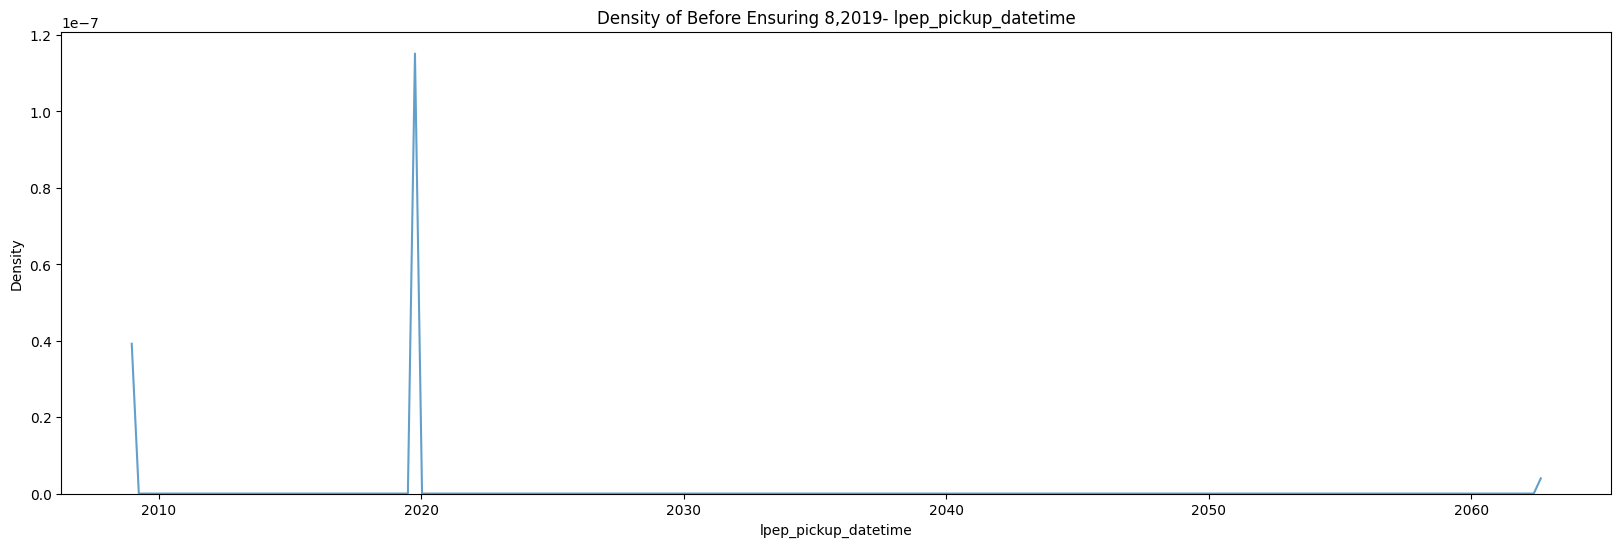

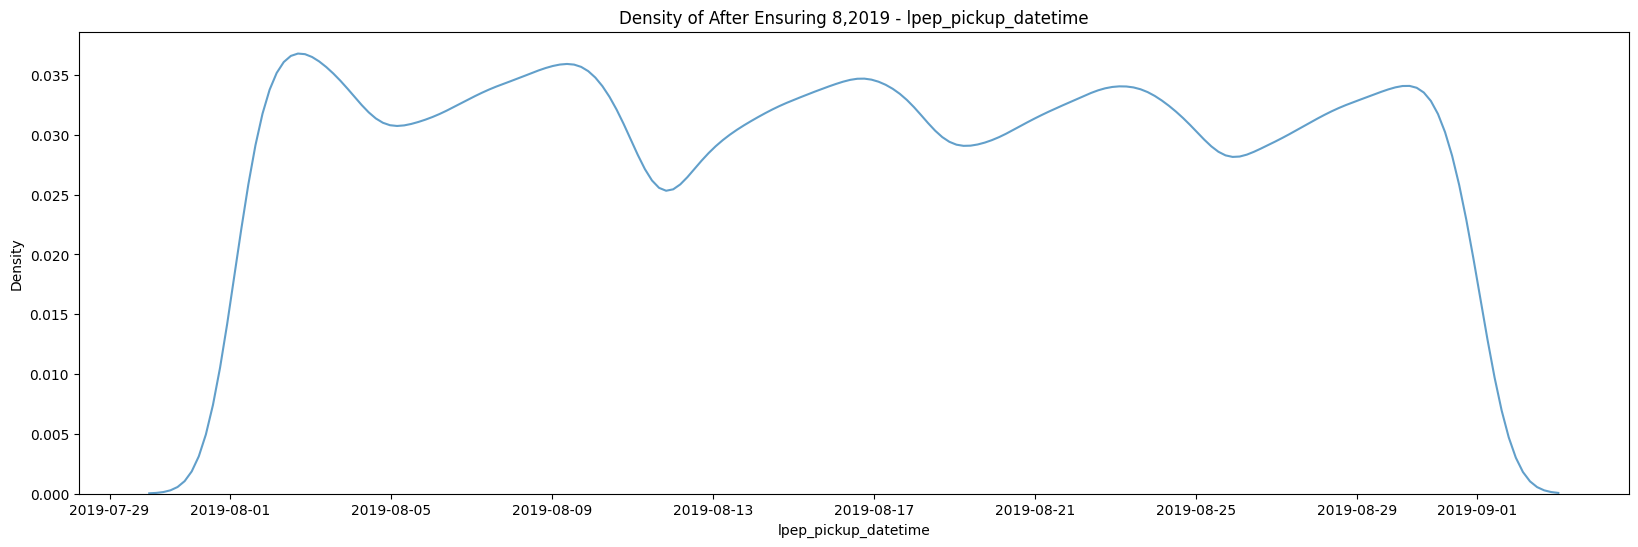

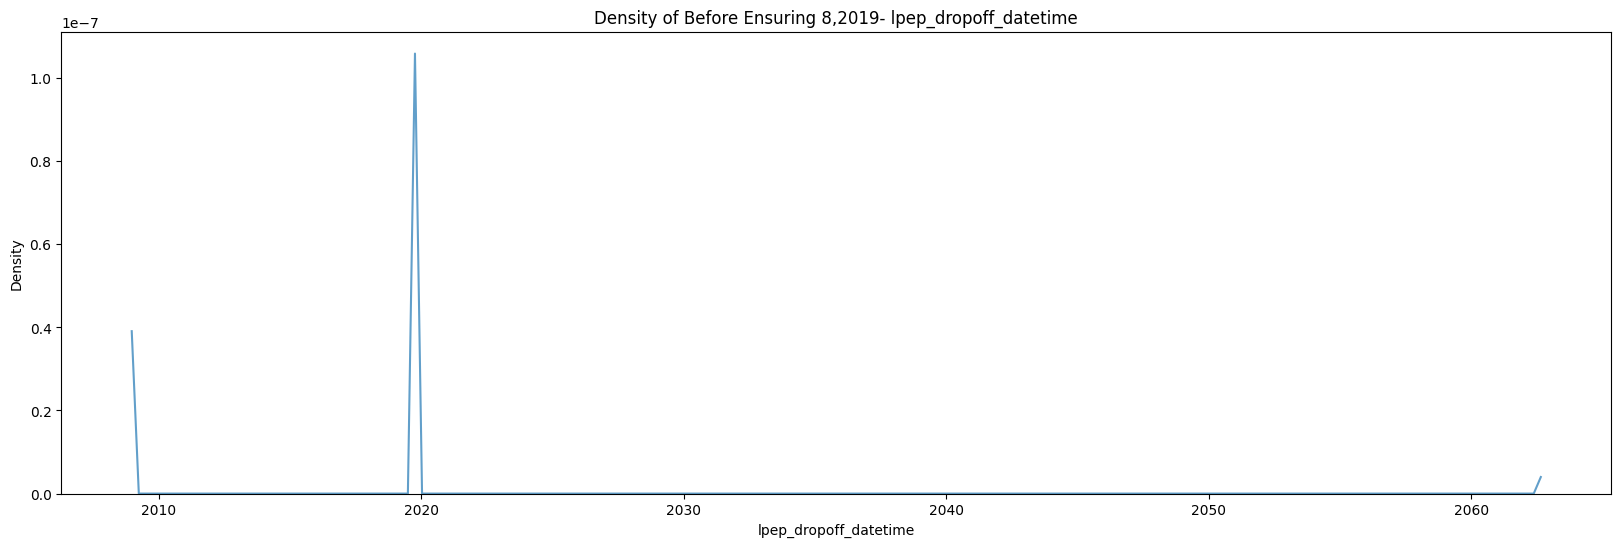

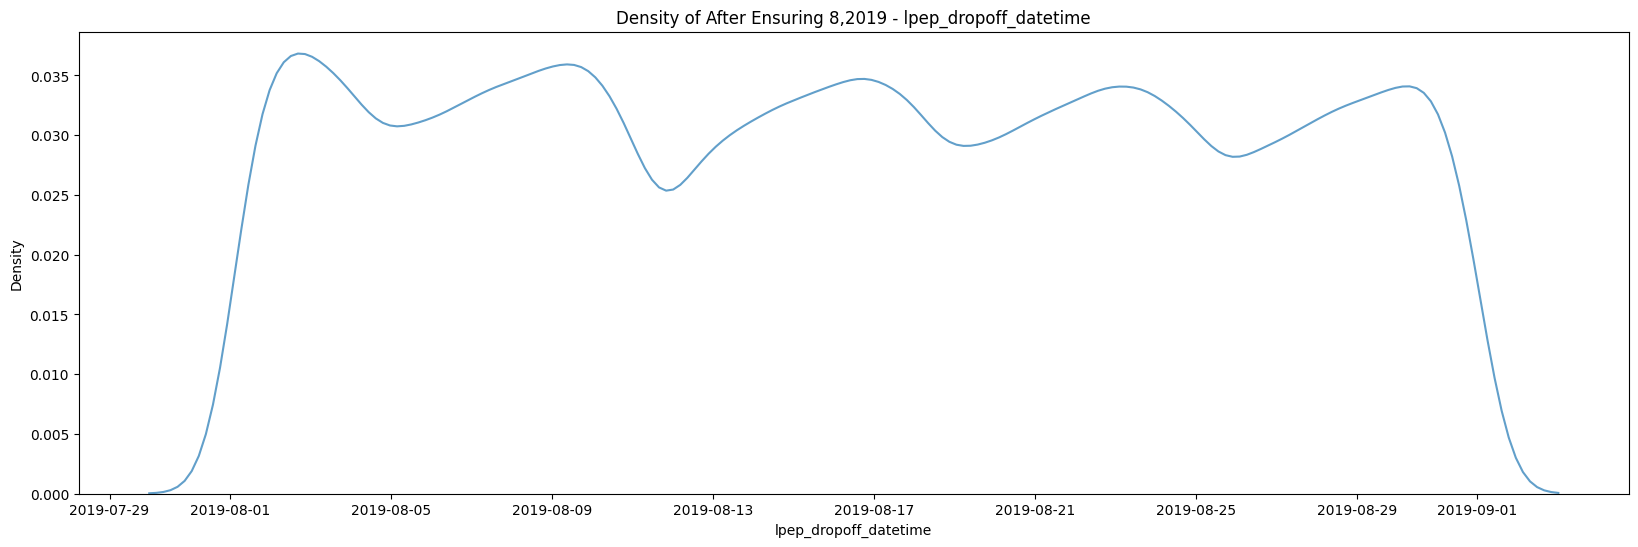

In [150]:
# handling any anomlies in any of the datetime fields time window
clean_df = ensure_proper_time_window(clean_df ,8,2019)

#### Handling Techinque Justifcation
- There are two viable approaches for addressing the presence of wrong dates within the features as described above:

    1. Dropping the records with the wrong dates 
    1. Changing the month and year part of the date records to the proper time window  

<br>
- Ultimately, it was decided that second approach was better just to keep the records again to prevent the loss of any form of information that might be valuable for analysis as the dates values ,might have been corrupted during transmission of data from the cabs to the server

_____

### Checking if a trip ends before it starts

In [151]:
def get_trip_duration(df):
    df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds()

def swap_times(row):
    if row['trip_duration'] < 0:
        row['lpep_pickup_datetime'], row['lpep_dropoff_datetime'] = row['lpep_dropoff_datetime'], row['lpep_pickup_datetime']
    return row

def switch_pickup_and_dropoff_if_needed(df):
    get_trip_duration(df)
    df = df.apply(swap_times, axis=1)
    get_trip_duration(df)  
    return df

In [152]:
get_trip_duration(clean_df)
clean_df[clean_df.trip_duration<0]

vendor lpep_pickup_datetime lpep_dropoff_datetime  \
3       VeriFone Inc.  2019-08-31 23:59:42   2019-08-01 00:11:44   
194     VeriFone Inc.  2019-08-31 23:57:59   2019-08-01 00:03:35   
386449  VeriFone Inc.  2019-08-31 00:48:13   2019-08-01 00:00:00   
386486  VeriFone Inc.  2019-08-31 00:28:49   2019-08-01 00:06:58   
386531  VeriFone Inc.  2019-08-31 00:52:24   2019-08-01 00:00:00   
...               ...                  ...                   ...   
449685  VeriFone Inc.  2019-08-31 23:55:00   2019-08-01 00:16:00   
449687  VeriFone Inc.  2019-08-31 23:04:00   2019-08-01 00:16:00   
449688  VeriFone Inc.  2019-08-31 23:36:00   2019-08-01 00:02:00   
449690  VeriFone Inc.  2019-08-31 23:17:00   2019-08-01 00:00:00   
449694  VeriFone Inc.  2019-08-31 23:33:00   2019-08-01 00:00:00   

       store_and_fwd_flag      rate_type  \
3                       N  Standard rate   
194                     N  Standard rate   
386449                  N  Standard rate   
386486                  N  Standard rate   
386531                  N  Standard rate   
...                   ...            ...   
449685                NaN        Unknown   
449687                NaN        Unknown   
449688                NaN        Unknown   
449690                NaN        Unknown   
449694                NaN        Unknown   

                                 pu_location  \
3                       Brooklyn,Boerum Hill   
194                   Queens,Jackson Heights   
386449  Queens,Long Island City/Queens Plaza   
386486    Brooklyn,Williamsburg (South Side)   
386531                       Queens,Elmhurst   
...                                      ...   
449685               Queens,South Ozone Park   
449687                Queens,Hammels/Arverne   
449688               Brooklyn,Bushwick South   
449690                        Queens,Maspeth   
449694                   Brooklyn,Ocean Hill   

                               do_location  passenger_count  trip_distance  \
3                      Brooklyn,Kensington              1.0           3.85   
194                 Queens,Jackson Heights              1.0           0.76   
386449                      Queens,Astoria              1.0           1.22   
386486                 Brooklyn,Park Slope              5.0           4.44   
386531             Queens,Elmhurst/Maspeth              4.0           1.94   
...                                    ...              ...            ...   
449685             Brooklyn,Bushwick North              NaN           6.67   
449687                 Bronx,Melrose South              NaN          24.91   
449688  Brooklyn,Prospect-Lefferts Gardens              NaN           3.93   
449690                  Brooklyn,Flatlands              NaN           0.00   
449694                  Brooklyn,Flatlands              NaN           4.49   

        fare_amount  ...  pickup_time  pickup_hour  pickup_day  dropoff_date  \
3             13.00  ...     23:59:42           23   Wednesday    2019-08-01   
194            5.50  ...     23:57:59           23   Wednesday    2019-08-01   
386449         6.00  ...     00:48:13            0    Saturday    2019-09-01   
386486        17.50  ...     00:28:49            0    Saturday    2019-09-01   
386531         9.50  ...     00:52:24            0    Saturday    2019-09-01   
...             ...  ...          ...          ...         ...           ...   
449685        32.75  ...     23:55:00           23    Saturday    2019-09-01   
449687        58.66  ...     23:04:00           23    Saturday    2019-09-01   
449688        23.11  ...     23:36:00           23    Saturday    2019-09-01   
449690        40.53  ...     23:17:00           23    Saturday    2019-09-01   
449694        23.32  ...     23:33:00           23    Saturday    2019-09-01   

        dropoff_time  dropoff_hour  dropoff_day   PU_area   DO_area  \
3           00:11:44             0     Thursday  Brooklyn  Brooklyn   
194         00:03:35             0     Thursday    Q

In [153]:
clean_df = switch_pickup_and_dropoff_if_needed(clean_df)
clean_df[clean_df.trip_duration<0]

Empty DataFrame
Columns: [vendor, lpep_pickup_datetime, lpep_dropoff_datetime, store_and_fwd_flag, rate_type, pu_location, do_location, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, ehail_fee, improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge, pickup_date, pickup_time, pickup_hour, pickup_day, dropoff_date, dropoff_time, dropoff_hour, dropoff_day, PU_area, DO_area, trip_duration]
Index: []

[0 rows x 31 columns]

### Checking for incorrect passenger count

In [154]:
clean_df.passenger_count.value_counts()

passenger_count
1.0      343613
2.0       30092
5.0       10742
6.0        6334
3.0        5554
4.0        1953
8.0          12
7.0           8
555.0         4
Name: count, dtype: int64

In [155]:
def handle_passenger_count(value):
    if value ==555:
        return 5 
    if value > 9:
        return 1
    if 7 <= value <= 8: 
        return value - 3
    return value    
clean_df.passenger_count = clean_df.passenger_count.apply(handle_passenger_count)

In [156]:
clean_df.passenger_count.value_counts()

passenger_count
1.0    343613
2.0     30092
5.0     10758
6.0      6334
3.0      5554
4.0      1961
Name: count, dtype: int64

#### Handling Techinque Justifcation

- Upon conducting research, it was established that the maximum number of passengers a green cab can accommodate is 6. As a result, any passenger counts falling within the range of 7 to 9 (of which there were many instances) were reduced by 3, under the assumption that they might have been erroneously entered by the driver. Additionally, any occurrences of the value 555 were assumed to be a result of a stuck 5 key on a keypad, and were subsequently replaced with the digit 5.

## Observing Missing Data (nulls and unknowns)

### Missing values detections

In [157]:
# Checking the ratios of null values
clean_df.isnull().mean()

vendor                   0.000000
lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       0.112124
rate_type                0.000000
pu_location              0.000000
do_location              0.000000
passenger_count          0.114272
trip_distance            0.000000
fare_amount              0.000000
extra                    0.463816
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
ehail_fee                0.999818
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             0.024752
trip_type                0.000000
congestion_surcharge     0.112124
pickup_date              0.000000
pickup_time              0.000000
pickup_hour              0.000000
pickup_day               0.000000
dropoff_date             0.000000
dropoff_time             0.000000
dropoff_hour             0.000000
dropoff_day              0.000000
PU_area                  0.000000
DO_area       

In [158]:
def get_categorical_counts(df):
    
    categorical_columns = df.select_dtypes(include=['object'],exclude=['datetime64']).columns
    for column in categorical_columns:
        unique_values = df[column].unique()
        counts = df[column].value_counts()
        print(f"Feature: {column}")
        for value, count in counts.items():
            print(f"  Value: {value} - Count: {count}")
get_categorical_counts(clean_df)

Feature: vendor
  Value: VeriFone Inc. - Count: 384350
  Value: Creative Mobile Technologies, LLC - Count: 65350
Feature: store_and_fwd_flag
  Value: N - Count: 398047
  Value: Y - Count: 1231
Feature: rate_type
  Value: Standard rate - Count: 387872
  Value: Unknown - Count: 50439
  Value: Negotiated fare - Count: 9915
  Value: JFK - Count: 921
  Value: Nassau or Westchester - Count: 356
  Value: Newark - Count: 196
  Value: Group ride - Count: 1
Feature: pu_location
  Value: Manhattan,East Harlem North - Count: 36859
  Value: Manhattan,East Harlem South - Count: 27366
  Value: Manhattan,Central Harlem - Count: 24825
  Value: Queens,Elmhurst - Count: 20940
  Value: Queens,Astoria - Count: 17765
  Value: Manhattan,Central Harlem North - Count: 15536
  Value: Manhattan,Morningside Heights - Count: 15114
  Value: Queens,Forest Hills - Count: 13525
  Value: Brooklyn,Fort Greene - Count: 12551
  Value: Queens,Jackson Heights - Count: 12141
  Value: Manhattan,Washington Heights South - Coun

#### Observations and findings 
- store_and_fwd_flag       0.112173
- passenger_count          0.114320
- extra                    0.463975
- ehail_fee                0.999818
- payment_type             0.024762
- congestion_surcharge     0.112173
all have missing values with different degrees and will be investged further to decide the proper mean of imputation 
- both locations features seem to have some unknown values stored as unknown or uknown such as Unknown,NV or Unknown,Unknown 
- from the data description trip distances seems to have some zero values which doesnt make sense that requires handling
- from the data description trip durations seems to have some zero values which doesnt make sense that requires handling
- the rate type , trip type , payment_type has some unknown values that requires handling
- the payment_type has some uknown values that requires handling 

- Congestion surcharge

_____

## Misssing values analysis

In [159]:
def count_missing_feature_values_by_group(df, group_feature, feature_to_check):
    group_values = df[group_feature].unique()
    group_value_counts = df[group_feature].value_counts()
    result = {}
    for group_value in group_values:
        group_mask = (df[group_feature] == group_value)
        count_missing_values = df[group_mask][feature_to_check].isnull().sum()
        result[group_value] = count_missing_values/group_value_counts[group_value] 
    print(f"the ratio of missing data in {feature_to_check} grouped by {group_feature} unique values is \n {result}")

In [160]:
def count_missing_values(feature:Series):
    return feature.isnull().value_counts()

______

### store_and_fwd_flag       0.112173

counting the number of missing values in this feature

In [161]:
count_missing_values(clean_df.store_and_fwd_flag)

store_and_fwd_flag
False    399278
True      50422
Name: count, dtype: int64

In [162]:
count_missing_feature_values_by_group(clean_df,'dropoff_hour','store_and_fwd_flag')
count_missing_feature_values_by_group(clean_df,'DO_area','store_and_fwd_flag')

the ratio of missing data in store_and_fwd_flag grouped by dropoff_hour unique values is 
 {0: 0.031800570217121134, 1: 0.018787079762689517, 2: 0.013262170467410642, 3: 0.01892744479495268, 4: 0.07649789962414327, 15: 0.11900354774024371, 5: 0.1869009584664537, 16: 0.10722934472934473, 6: 0.24820659971305595, 17: 0.08749205074137296, 7: 0.2305845338632224, 11: 0.16438062580368623, 8: 0.2021835410443918, 12: 0.15639554224883567, 9: 0.17589522546419098, 19: 0.06496519721577726, 13: 0.15680653288159152, 10: 0.16936936936936936, 14: 0.13991423526444127, 18: 0.0828287197231834, 20: 0.05730659025787966, 21: 0.05512393636699963, 22: 0.04887694569791614, 23: 0.041010367145884644}


the ratio of missing data in store_and_fwd_flag grouped by DO_area unique values is 
 {'Queens': 0.08661699002154008, 'Brooklyn': 0.17346253205522488, 'Manhattan': 0.06332526666979935, 'Bronx': 0.25301204819277107, 'Unknown': 0.058078927773641105, 'EWR': 0.0, 'Staten Island': 0.34375}


#### Observation and findings
- There is no apparent pattern or observation that can account for the missing values in the "store_and_fwd_flag" feature, as these values are related to server connections which depends on the taxi location and time of connection , which can affect the ability to connect to the server , the missing values are almost equally distrbuited along the drop off location and drop off time which is the time the taxis tries to the server. Hence, these missing values are considered to be Missing Completely At Random (MCAR). 
- to preserve the distrubation of the "store_and_fwd_flag" in the dataset the missing values will be imputed by frequency 

______

### passenger_count          0.114320

In [163]:
count_missing_values(clean_df.passenger_count)

passenger_count
False    398312
True      51388
Name: count, dtype: int64

In [164]:
clean_df[clean_df.passenger_count.isnull()][["trip_type"]].value_counts()

trip_type  
Unknown        50423
Street-hail      897
Dispatch          68
Name: count, dtype: int64

#### Observation and findings
- The majority of records with missing passenger counts exhibit "Unknown" in the trip type field. These values are indicative of data that is Missing Not At Random (MNAR) and necessitate further investigation and will properly be imputed with the mode of the "Unknown" features .

______

### extra                    0.463975

In [165]:
count_missing_values(clean_df.extra)

extra
False    241122
True     208578
Name: count, dtype: int64

In [166]:
clean_df.extra.value_counts()

extra
0.50    107314
1.00     76539
2.75     49873
5.50      2930
3.25      2444
3.75      1519
8.25       306
4.50       181
0.30         7
0.80         6
1.80         2
5.30         1
Name: count, dtype: int64

#### **Observation and findings**
- the extra feature missing values are MNAR as they indicate that there is no extra_charge taken
- the missing values will be filled with zero indicating no extra charge

______

### ehail_fee                0.999818

In [167]:
count_missing_values(clean_df.ehail_fee)

ehail_fee
True     449618
False        82
Name: count, dtype: int64

In [168]:
clean_df.ehail_fee.value_counts()

ehail_fee
0.00    81
1.95     1
Name: count, dtype: int64

In [169]:
clean_df[clean_df.ehail_fee.isnull()]["vendor"].value_counts()/taxis_df.vendor.value_counts()

vendor
VeriFone Inc.                        0.999766
Creative Mobile Technologies, LLC    0.999985
Name: count, dtype: float64

#### **Observation and findings**
- Almost the entire feature of e-hail fee feature is missing giving us no indicator of why it might be missing , hence the feature is MCAR 
- there are two possible scenarios to handling this missing data either getting rid of the feature entirely cause its almost all or to assume to fill it with the mode (0)


______

### payment_type             0.024762

In [170]:
count_missing_values(clean_df.payment_type)

payment_type
False    438569
True      11131
Name: count, dtype: int64

In [171]:
clean_df[(clean_df.payment_type.isnull()) ]['vendor'].value_counts()

vendor
Creative Mobile Technologies, LLC    11131
Name: count, dtype: int64

In [172]:
clean_df.payment_type.value_counts()

payment_type
Credit card    208520
Cash           176594
Unknown         50422
No charge        2039
Dispute           983
Uknown             11
Name: count, dtype: int64

In [173]:
clean_df[(clean_df.payment_type == "Unknown") ]['vendor'].value_counts()

vendor
VeriFone Inc.    50422
Name: count, dtype: int64

In [174]:
clean_df[(clean_df.payment_type == "Uknown") ]['vendor'].value_counts()

vendor
Creative Mobile Technologies, LLC    11
Name: count, dtype: int64

#### **Observation and findings**
- its clear from the finding that the payment_type feature is MNAR
- all the "unknown" type payment have their vendor as VeriFone Inc.
- all the "uknow" and null type payment have their vendors as Creative Mobile Technologies, LLC 
- the null values and uknown are going to be imputed with the mode of the payment types whose vendor is Creative Mobile Technologies, LLC 
- while all the "unknown" values will be imputed with the mode of the payment types whose vendor is VeriFone Inc.

______

### congestion_surcharge     0.112173

In [175]:
clean_df[(clean_df.congestion_surcharge.isnull())]['vendor'].value_counts()
clean_df.congestion_surcharge.isnull().value_counts()

congestion_surcharge
False    399278
True      50422
Name: count, dtype: int64

In [176]:
clean_df.groupby("vendor").congestion_surcharge.value_counts()

vendor                             congestion_surcharge
Creative Mobile Technologies, LLC  0.00                     56818
                                   2.75                      8532
VeriFone Inc.                      0.00                    280686
                                   2.75                     53242
Name: count, dtype: int64

In [177]:
clean_df.congestion_surcharge.isnull().value_counts()

congestion_surcharge
False    399278
True      50422
Name: count, dtype: int64

In [178]:
clean_df[clean_df.congestion_surcharge.isnull()][["rate_type","trip_type","vendor"]].value_counts()

rate_type  trip_type  vendor       
Unknown    Unknown    VeriFone Inc.    50422
Name: count, dtype: int64

#### **Observation and findings**
- its clear from the finding that the congestion_surcharge feature is MNAR
- all the null values of the congestion_surcharge feature have an unknown trip type and Rate type and vendor VeriFone Inc.
- all null values will be imputed by mode to maintain the distrubtion of the data of th

______

### Zero distance trips with an non zero duration 

In [179]:
zero_distance_trips = clean_df[(clean_df.trip_distance == 0) & (clean_df.trip_duration != 0)][["trip_duration", "pu_location", "do_location"]]
zero_distance_trips

trip_duration                            pu_location  \
0                26.0  Queens,Long Island City/Hunters Point   
30                5.0                    Queens,North Corona   
73              572.0                         Queens,Bayside   
213               3.0         Manhattan,Central Harlem North   
226              11.0                         Queens,Jamaica   
...               ...                                    ...   
449520         1500.0                      Bronx,Eastchester   
449635          540.0                   Bronx,Pelham Parkway   
449641           60.0                   Queens,Richmond Hill   
449666          720.0             Bronx,Van Nest/Morris Park   
449690      2675820.0                         Queens,Maspeth   

                                   do_location  
0        Queens,Long Island City/Hunters Point  
30                         Queens,North Corona  
73                              Queens,Bayside  
213                                 Unknown,NV  
226                             Queens,Jamaica  
...                                        ...  
449520  Bronx,East Concourse/Concourse Village  
449635                        Bronx,Co-Op City  
449641                    Queens,Richmond Hill  
449666                        Bronx,Bronx Park  
449690                      Brooklyn,Flatlands  

[12669 rows x 3 columns]

### Trips with durations trips with an no distance 

In [180]:
missing_distance_trips = zero_distance_trips[(zero_distance_trips.trip_duration > 5*60) & (zero_distance_trips.trip_duration < 10*60)]
missing_distance_trips

trip_duration                         pu_location  \
73              572.0                      Queens,Bayside   
1431            392.0                    Brooklyn,Bedford   
3304            495.0           Brooklyn,Bensonhurst West   
4415            319.0  Brooklyn,Prospect-Lefferts Gardens   
6909            440.0                      Queens,Astoria   
...               ...                                 ...   
443536          360.0                 Queens,Forest Hills   
446096          480.0         Manhattan,East Harlem North   
448724          540.0                    Bronx,Highbridge   
449479          420.0             Queens,South Ozone Park   
449635          540.0                Bronx,Pelham Parkway   

                           do_location  
73                      Queens,Bayside  
1431                  Brooklyn,Bedford  
3304         Brooklyn,Bensonhurst West  
4415      Brooklyn,Crown Heights South  
6909    Queens,Queensbridge/Ravenswood  
...                                ...  
443536             Queens,Forest Hills  
446096     Manhattan,East Harlem North  
448724                Bronx,Highbridge  
449479         Queens,South Ozone Park  
449635                Bronx,Co-Op City  

[711 rows x 3 columns]

_____

### Checking for useless Records

- Checking for records with more than 3 Unknown or null values.

In [181]:
def find_records_with_multiple_unknown_or_none(df, threshold=3):
    unknown_or_none_records = []

    for index, row in df.iterrows():
        count = 0
        for col in df.columns:
            if row[col] == "Unknown" or row[col] == "None" or row[col] == "Unknown,Unknown" or row[col] == "Unknown,NV"  :
                count += 1
            if count >= threshold:
                unknown_or_none_records.append((index))
                break

    return unknown_or_none_records
len(find_records_with_multiple_unknown_or_none(clean_df))

51228

## Handling Missing data

### Helpers

### Feature Cleaning Functions

In [182]:
def drop_useless_records(df):
    dfCopy = df.copy()
    usless_records = find_records_with_multiple_unknown_or_none(dfCopy)
    dfCopy = dfCopy.drop(usless_records)
    return dfCopy

def remove_unknowns(df:DataFrame,lookup_table=False):
    df_copy = df.copy()
    df_copy.payment_type = df_copy.payment_type.replace("Uknown", None)
    df_copy.rate_type = df_copy.rate_type.replace("Unknown", None)
    df_copy.trip_type = df_copy.trip_type.replace("Unknown", None)
    df_copy.pu_location = df_copy.pu_location.replace("Unknown,Unknown", None)
    
    df_copy.pu_location = df_copy.pu_location.replace("Unknown,NV", None)
    df_copy.PU_area = df_copy.PU_area.replace("Unknown",None)
    df_copy.do_location = df_copy.do_location.replace("Unknown,Unknown", None)
    df_copy.do_location = df_copy.do_location.replace("Unknown,NV", None)
    df_copy.DO_area = df_copy.PU_area.replace("Unknown",None)
    if lookup_table:
        LOOKUP.loc[len(LOOKUP)] = {"column_name": "payment_type", "original_value": "Uknown", "imputed_value": "NONE"}
        LOOKUP.loc[len(LOOKUP)] = {"column_name": "rate_type", "original_value": "Unknown", "imputed_value": "NONE"}
        LOOKUP.loc[len(LOOKUP)] = {"column_name": "pu_location", "original_value": "Unknown,Unknown", "imputed_value": "NONE"}
        LOOKUP.loc[len(LOOKUP)] = {"column_name": "do_location", "original_value": "Unknown,Unknown", "imputed_value": "NONE"}
        LOOKUP.loc[len(LOOKUP)] = {"column_name": "pu_location", "original_value": "Unknown,NV", "imputed_value": "Imputed like 'Unkown,Unkown'"}
        LOOKUP.loc[len(LOOKUP)] = {"column_name": "do_location", "original_value": "Unknown,NV", "imputed_value": "Imputed like 'Unkown,Unkown'"}
        LOOKUP.loc[len(LOOKUP)] = {"column_name": "trip_type", "original_value": "Unknown", "imputed_value": "NONE"}
        
    return df_copy

### Feature Imputation Functions

In [183]:
def impute_with_value(series, value,lookup_table=False):
    if lookup_table:
        entryIndex = LOOKUP[(LOOKUP.column_name == series.name) & (LOOKUP.imputed_value == "NONE")].index[0]
        LOOKUP.at[entryIndex, "imputed_value"] = value
    return series.fillna(value)

def impute_with_mode(series,lookup_table=False):
    if lookup_table:
        entryIndex = LOOKUP[(LOOKUP.column_name == series.name) & (LOOKUP.imputed_value == "NONE")].index[0]
        LOOKUP.at[entryIndex, "imputed_value"] = series.mode()[0]
    return series.fillna(series.mode()[0])

def impute_by_frequency(feature,lookup_table=False):
    newfeature = feature.copy()
    choices = feature.value_counts().index
    freqs = feature.value_counts(normalize=True)
    nullCount = feature.isna().sum()
    imputations = pd.Series(np.random.choice(choices, p=freqs, size=nullCount))
    imputations.index = newfeature.loc[feature.isna()].index
    newfeature.loc[feature.isna()] = imputations
    if lookup_table:
        entryIndex = LOOKUP[(LOOKUP.column_name == feature.name) & (LOOKUP.imputed_value == "NONE")].index[0]
        LOOKUP.at[entryIndex, "imputed_value"] = "Imputed By Frequency"
    return newfeature

def impute_by_group_mode(df, feature, condition_column, condition_value,lookup_table=False):
    if condition_value is None:
        # Handle the case where condition_value is None
        mode_series = df[df[condition_column].isna()][feature].mode()
    else:
        # Calculate the mode for the specified condition_value
        mode_series = df[df[condition_column] == condition_value][feature].mode()
    if not mode_series.empty:
        mode = mode_series[0]
        df[feature] = df[feature].fillna(mode)
    else:
        mode = feature.mode()[0]
        df[feature] = df[feature].fillna(0)
    if lookup_table:
        entryIndex = LOOKUP[(LOOKUP.column_name == feature) & (LOOKUP.imputed_value == "NONE")].index[0]
        LOOKUP.at[entryIndex, "imputed_value"] = f"imputed by the Mode {mode} of {feature} ={condition_value}"
    return df


### impute missing and clean function

In [184]:
def imputeMissing(df,lookup_table=False):
    df_copy = df.copy()
    if lookup_table:
        LOOKUP.loc[len(LOOKUP)] = {"column_name": "payment_type", "original_value": "Unknown", "imputed_value": "NONE"}
        LOOKUP.loc[len(LOOKUP)] = {"column_name": "passenger_count", "original_value": "NAN", "imputed_value": "NONE"}
        LOOKUP.loc[len(LOOKUP)] = {"column_name": "store_and_fwd_flag", "original_value": "NAN", "imputed_value": "NONE"}
        LOOKUP.loc[len(LOOKUP)] = {"column_name": "congestion_surcharge", "original_value": "NAN", "imputed_value": "NONE"}
        LOOKUP.loc[len(LOOKUP)] = {"column_name": "extra", "original_value": "NAN", "imputed_value": "NONE"}
        LOOKUP.loc[len(LOOKUP)] = {"column_name": "ehail_fee", "original_value": "NAN", "imputed_value": "NONE"}
        
    df_copy = impute_by_group_mode(df_copy, 'passenger_count', 'trip_type', None,True)
    
    df_copy = impute_by_group_mode(df_copy, 'payment_type', 'vendor', 'Creative Mobile Technologies, LLC',True)
    df_copy.payment_type = df_copy.payment_type.replace("Unknown", None)
    df_copy = impute_by_group_mode(df_copy, 'payment_type', 'vendor', 'VeriFone Inc.',True)
    
    df_copy.rate_type = impute_with_mode(df_copy.rate_type,True)
    df_copy.trip_type = impute_with_mode(df_copy.trip_type,True)
    
    df_copy.store_and_fwd_flag = impute_by_frequency(df_copy.store_and_fwd_flag,True)
    df_copy.congestion_surcharge = impute_with_mode(df_copy.congestion_surcharge,True)
    df_copy.extra = impute_with_value(df_copy.extra, 0,True)
    df_copy.ehail_fee = impute_with_mode(df_copy.ehail_fee,True)
    
    df_copy.pu_location = impute_by_frequency(df_copy.pu_location,True)
    df_copy.do_location = impute_by_frequency(df_copy.do_location,True)
    df_copy["PU_area"] = split_location_series(df_copy.pu_location)
    df_copy["DO_area"] = split_location_series(df_copy.do_location)    
    
    return df_copy

def cleanData(df):
    dfCopy = df.copy()
    dfCopy = drop_useless_records(dfCopy)
    dfCopy = remove_unknowns(dfCopy,True)
    dfCopy = imputeMissing(dfCopy,True)
    return dfCopy

### Filling missing data

In [185]:
imputed_df = cleanData(clean_df)
LOOKUP

column_name   original_value  encoded_value  \
0           payment_type           Uknown            NaN   
1              rate_type          Unknown            NaN   
2            pu_location  Unknown,Unknown            NaN   
3            do_location  Unknown,Unknown            NaN   
4            pu_location       Unknown,NV            NaN   
5            do_location       Unknown,NV            NaN   
6              trip_type          Unknown            NaN   
7           payment_type          Unknown            NaN   
8        passenger_count              NAN            NaN   
9     store_and_fwd_flag              NAN            NaN   
10  congestion_surcharge              NAN            NaN   
11                 extra              NAN            NaN   
12             ehail_fee              NAN            NaN   

                                        imputed_value  
0   imputed by the Mode Credit card of payment_typ...  
1                                       Standard rate  
2                                Imputed By Frequency  
3                                Imputed By Frequency  
4                        Imputed like 'Unkown,Unkown'  
5                        Imputed like 'Unkown,Unkown'  
6                                         Street-hail  
7   imputed by the Mode Credit card of payment_typ...  
8    imputed by the Mode 2.0 of passenger_count =None  
9                                Imputed By Frequency  
10                                                0.0  
11                                                  0  
12                                                0.0

## Checking cleaned data

#### Helper functions

In [186]:
def compare_numerical_feature(feature, dfBefore, dfAfter):
    # Calculate value counts
    feature_before = dfBefore[feature].value_counts().round(8)
    feature_after = dfAfter[feature].value_counts().round(8)

    # Calculate the count of null values
    null_count_before = dfBefore[feature].isnull().sum()
    null_count_after = dfAfter[feature].isnull().sum()

    # Normalize the null value counts
    # Add null value counts to the "Before" and "After" features
    feature_before["None"] = null_count_before
    feature_after["None"] = null_count_after

    print(f"number of records before Cleaning:{len(dfBefore[feature])}")
    print("Before - Value Counts (including null):")
    print(feature_before)
    
    print(f"number of records after Cleaning:{len(dfBefore[feature])}")
    print("\nAfter - Value Counts (including null):")
    print(feature_after)

  
def compare_categorical_feature(feature, dfBefore, dfAfter):
    feature_before = dfBefore[feature].value_counts().round(8)
    feature_after = dfAfter[feature].value_counts().round(8)
    
    null_count_before = dfBefore[feature].isnull().sum()
    null_count_after = dfAfter[feature].isnull().sum()

    feature_before["None"] = null_count_before
    feature_after["None"] = null_count_after
    
    fig, ax = (None, None)
    fig, ax = plt.subplots(2,1)
    
    fig.tight_layout(pad=5)
        
    plt.suptitle("Feature Comparison: " + feature)
    fig.set_figwidth(15)
    fig.subplots_adjust(hspace=0.5)
    
    plt.subplot(211)
        
    plt.title("Before")
    beforeBars = plt.bar(feature_before.index, feature_before)
    plt.bar_label(beforeBars, feature_before, label_type="center", padding=10)
    plt.subplot(212)    
    plt.title("After")
    afterBars = plt.bar(feature_after.index, feature_after)
    plt.bar_label(afterBars, feature_after, label_type="center", padding=10)

    plt.show()


#### Visualization and analysis of cleaned data

In [187]:
imputed_df.isnull().mean()

vendor                   0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
rate_type                0.0
pu_location              0.0
do_location              0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
ehail_fee                0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
pickup_date              0.0
pickup_time              0.0
pickup_hour              0.0
pickup_day               0.0
dropoff_date             0.0
dropoff_time             0.0
dropoff_hour             0.0
dropoff_day              0.0
PU_area                  0.0
DO_area                  0.0
trip_duration            0.0
dtype: float64

##### Categorical Features  

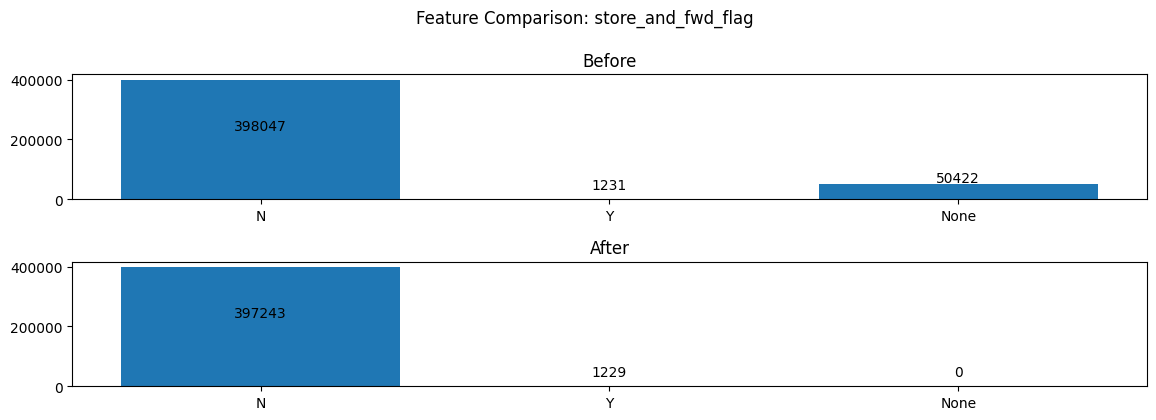

In [188]:
compare_categorical_feature("store_and_fwd_flag", clean_df, imputed_df)

_______

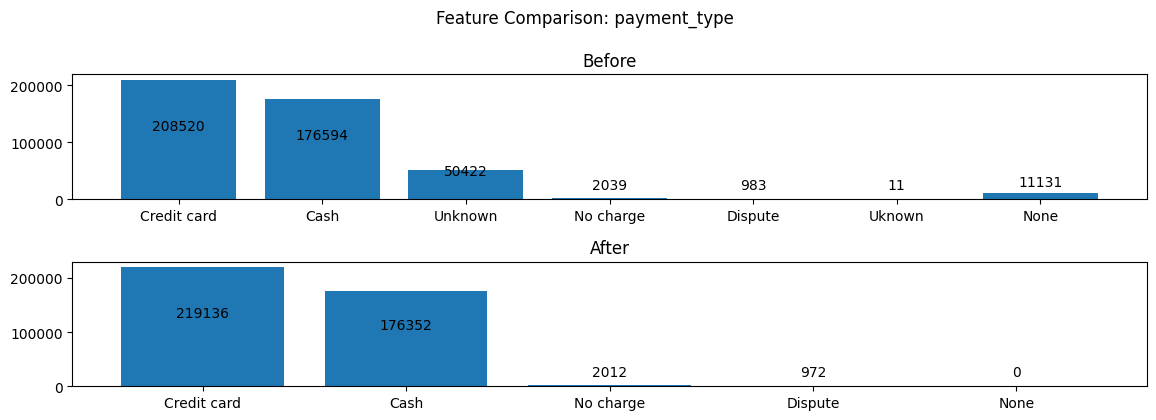

In [189]:
compare_categorical_feature("payment_type", clean_df, imputed_df)

_______

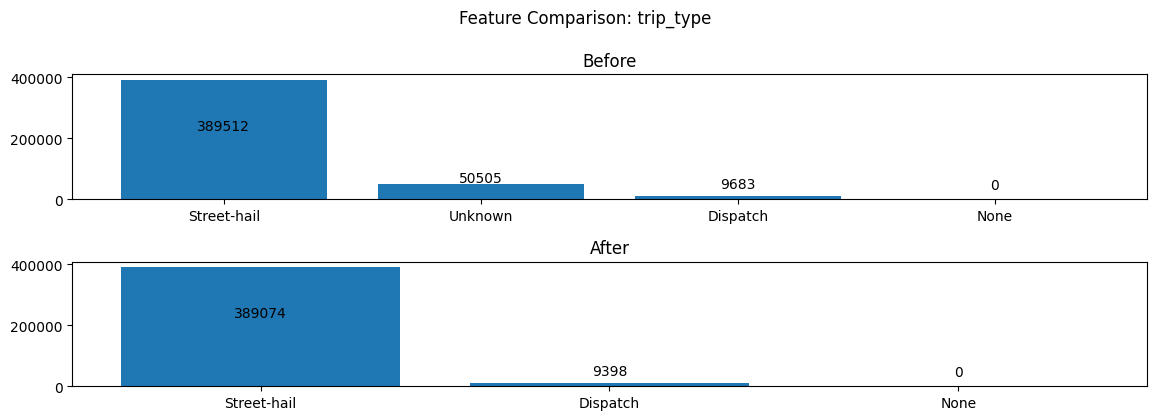

In [190]:
compare_categorical_feature("trip_type", clean_df, imputed_df)

_______

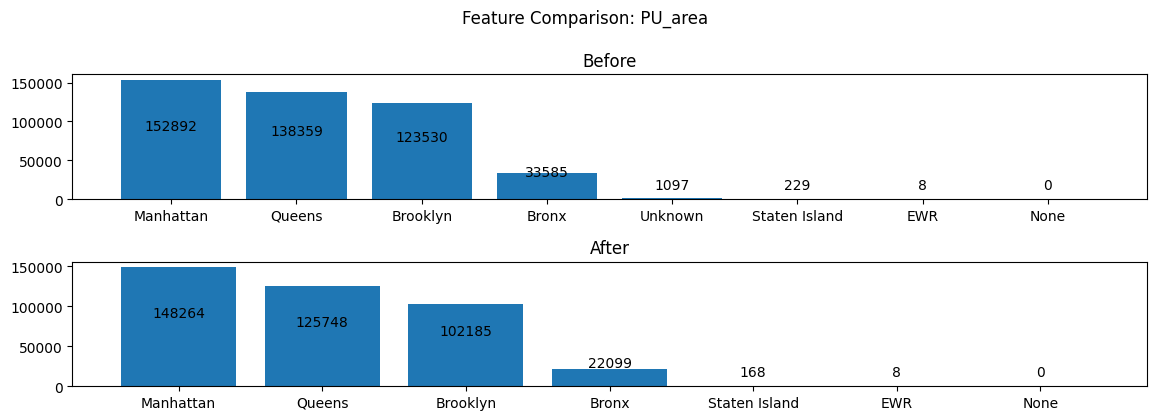

In [191]:
compare_categorical_feature("PU_area", clean_df, imputed_df)

_______

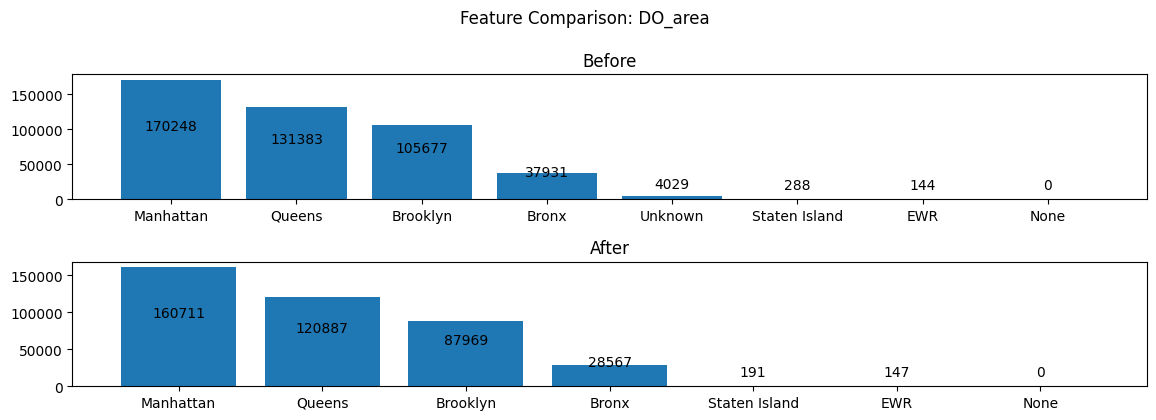

In [192]:
compare_categorical_feature("DO_area", clean_df, imputed_df)

_______

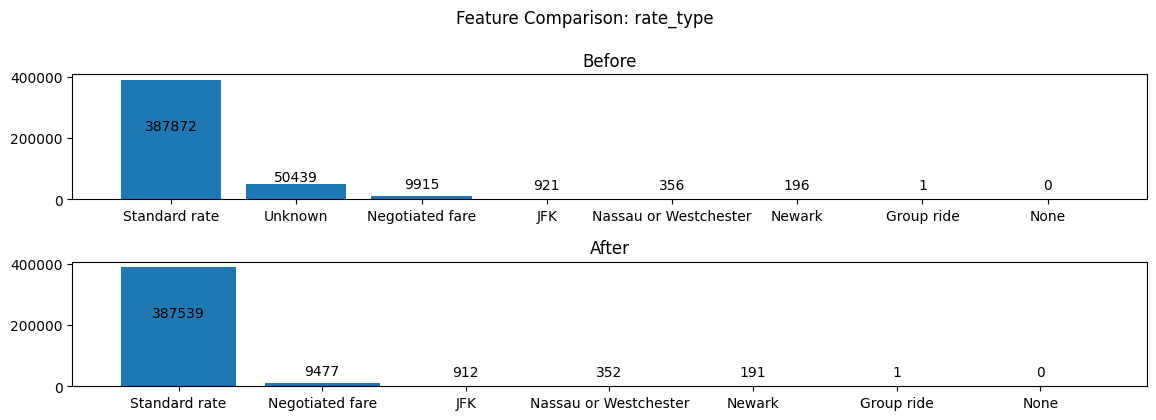

In [193]:
compare_categorical_feature("rate_type", clean_df, imputed_df)

_______

##### Numeric features

In [194]:
compare_numerical_feature("ehail_fee",clean_df,imputed_df)

number of records before Cleaning:449700
Before - Value Counts (including null):
ehail_fee
0.0         81
1.95         1
None    449618
Name: count, dtype: int64
number of records after Cleaning:449700

After - Value Counts (including null):
ehail_fee
0.0     398471
1.95         1
None         0
Name: count, dtype: int64


_______

In [195]:
compare_numerical_feature("congestion_surcharge",clean_df,imputed_df)

number of records before Cleaning:449700
Before - Value Counts (including null):
congestion_surcharge
0.0     337504
2.75     61774
None     50422
Name: count, dtype: int64
number of records after Cleaning:449700

After - Value Counts (including null):
congestion_surcharge
0.0     336699
2.75     61773
None         0
Name: count, dtype: int64


_______

In [196]:
compare_numerical_feature("extra",clean_df,imputed_df)

number of records before Cleaning:449700
Before - Value Counts (including null):
extra
0.5     107314
1.0      76539
2.75     49873
5.5       2930
3.25      2444
3.75      1519
8.25       306
4.5        181
0.3          7
0.8          6
1.8          2
5.3          1
None    208578
Name: count, dtype: int64
number of records after Cleaning:449700

After - Value Counts (including null):
extra
0.0     205932
0.5     107213
1.0      76481
2.75      4691
3.25      2444
3.75      1519
4.5        180
0.8          5
0.3          5
1.8          2
None         0
Name: count, dtype: int64


_______

In [197]:
compare_numerical_feature("passenger_count",clean_df,imputed_df)

number of records before Cleaning:449700
Before - Value Counts (including null):
passenger_count
1.0     343613
2.0      30092
5.0      10758
6.0       6334
3.0       5554
4.0       1961
None     51388
Name: count, dtype: int64
number of records after Cleaning:449700

After - Value Counts (including null):
passenger_count
1.0     342914
2.0      30980
5.0      10749
6.0       6332
3.0       5543
4.0       1954
None         0
Name: count, dtype: int64


_______

### Findings and conclusions 

- Each feature impuation reasoning is avaliable under each feature analysis. 
- The Checking on the values impuation either through visualization or numeric counting shows that all values where imputed where thier corresponding method.
- The Lookup table was imputed programatically with each corresponding imputed value and techinque of impuation.  
- Records(51228) with more than 3 essintial features e.g.:trip_type,PU_Location missing where dropped to ensure that the data remain isnt heavily manipluted

## Observing outliers

In [198]:
imputed_df.skew(numeric_only=True)

passenger_count            3.633838
trip_distance              3.811297
fare_amount                6.706271
extra                      2.669900
mta_tax                   -5.871503
tip_amount                23.609850
tolls_amount               7.555973
ehail_fee                631.246386
improvement_surcharge     -5.862837
total_amount               5.552676
congestion_surcharge       1.906326
pickup_hour               -0.566378
dropoff_hour              -0.601141
trip_duration             39.345889
dtype: float64

In [199]:
def visualize_outliers_kde(df,numerical_cols) :

    plt.figure().set(figwidth=10, figheight=5)
    for col in range(len(numerical_cols)):
        plt.subplot(2,3,col+1)
        sns.kdeplot(df[numerical_cols[col]])
    plt.tight_layout() 

In [200]:
def visualize_outliers_box(df,numerical_cols) :
    plt.figure().set(figwidth=10, figheight=5)
    for col in range(len(numerical_cols)):
        plt.subplot(2,3,col+1)
        plt.boxplot(df[numerical_cols[col]])
        plt.title(numerical_cols[col])
    plt.tight_layout() 

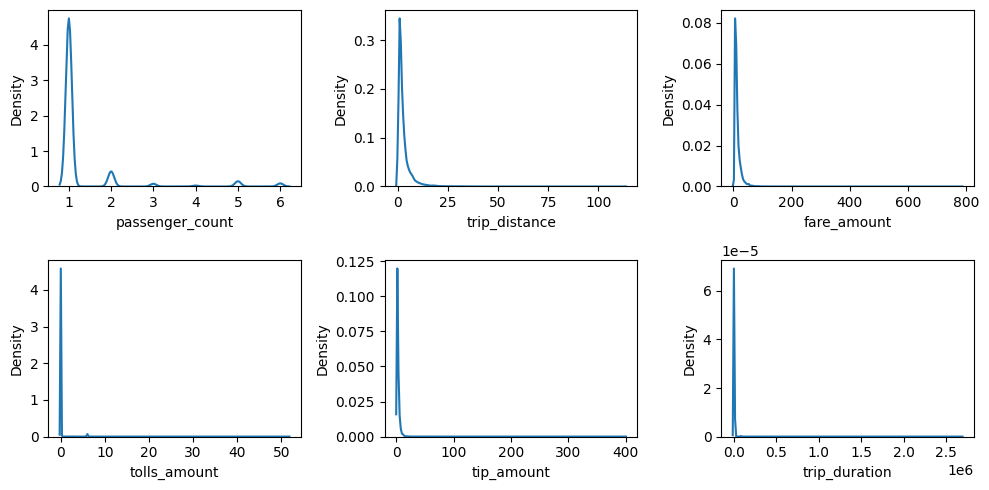

In [201]:
visualize_outliers_kde(imputed_df,["passenger_count","trip_distance","fare_amount","tolls_amount","tip_amount","trip_duration"])

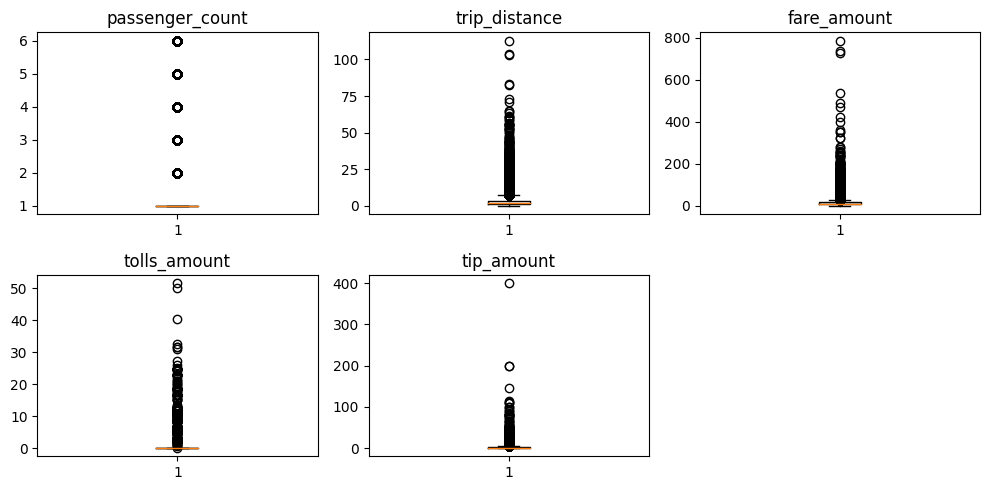

In [202]:
visualize_outliers_box(imputed_df,["passenger_count","trip_distance","fare_amount","tolls_amount","tip_amount"])

### Observations and findings

- The data analysis, including the use of .describe() and skewness measures, indicates that most of the features have skewness values greater than 6, suggesting a significant presence of outliers in the data. However, it's important to note that certain columns, such as `extra`, `mta_tax`, `improvement_surcharge`, `pickup/dropoff_hour`, and `ehail_fee`, are categorical numerical features and cannot be definitively assessed for outliers.

- Regarding the outliers, the analysis has already identified them in the `passenger_count` column during the EDA. For the columns `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount` a more detailed examination will be conducted in an attempt to address and rectify these outlier values. By addressing these specific columns and recalculating the total amount, it is hoped that the outliers in the total_amount feature can also be mitigated.
- As for `trip duration` its not really a feature to detect outliers in as it is a calcuted values
- The majority of the numerical features do not exhibit a normal distribution, as evident from the KDE plots presented above. Therefore, the detection of outliers will rely on the utilization of the Interquartile Range (IQR) method.

## Handling outliers

In [203]:
imputed_df.shape[0]

398472

In [204]:
def count_feature_outliers(feature:Series,factor=2):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1
    cut_off = IQR * factor
    lower = Q1 - cut_off
    upper =  Q3 + cut_off
    return len(feature[feature<lower])+len(feature[feature>upper])
def count_data_frame_outliers(df, fator=2):
    numericalCols = df.select_dtypes(include=np.number).columns.tolist()

    result = []

    for col in numericalCols:
        series = df[col]
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - fator * iqr
        upper_bound = q3 + fator * iqr

        outliers = (series < lower_bound) | (series > upper_bound)
        outlier_count = outliers.sum()

        result.append({
            "column": col,
            "outlier_count": outlier_count,
            "q1": q1,
            "q3": q3,
            "iqr": iqr,
            "lowerBound": lower_bound,
            "upperBound": upper_bound
        })

    return pd.DataFrame(result)
def impute_outliers_with_value(feature:Series, value,factor=2):
    feature_copy = feature.copy()
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1

    lowerBound = q1 - factor*iqr
    upperBound = q3 + factor*iqr
    
    return feature_copy.apply(lambda x: x if lowerBound <= x <= upperBound else value)

def impute_outliers_with_freq(feature:Series,factor=2):
    feature_copy = feature.copy()
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1

    lowerBound = q1 - factor*iqr
    upperBound = q3 + factor*iqr
    
    feature_copy = feature_copy.apply(lambda x: x if lowerBound <= x <= upperBound else None)
    feature_copy = impute_by_frequency(feature_copy)
    return feature_copy

In [228]:
def handle_outliers(df):
    df_copy = df.copy()
    df_copy.trip_distance = impute_outliers_with_freq(df_copy.trip_distance)
    df_copy.fare_amount = impute_outliers_with_freq(df_copy.fare_amount)
    df_copy.tip_amount = impute_outliers_with_freq(df_copy.tip_amount)
    df_copy.tolls_amount = impute_outliers_with_value(df_copy.tolls_amount, df_copy[df_copy.tolls_amount != 0].tolls_amount.mean())
    df_copy.total_amount = df_copy.tolls_amount + df_copy.tip_amount + df_copy.fare_amount + df_copy.extra + df_copy.improvement_surcharge + df_copy.mta_tax + df_copy.ehail_fee
    df_copy.trip_duration = impute_outliers_with_freq(df_copy.trip_duration)
    df_copy.lpep_dropoff_datetime = df_copy.lpep_pickup_datetime +  pd.to_timedelta(df_copy.trip_duration, unit='s')
    return df_copy
def handle_zero_trips(df):
    df_copy = df.copy()
    zeroDurationTrips = df_copy[(df_copy.trip_duration == 0)].index
    df_copy = df_copy.drop(zeroDurationTrips)
    missingDistanceTrips = df_copy[(df_copy.trip_distance == 0) & (df_copy.trip_duration > 300)].index
    df_copy = df_copy.drop(missingDistanceTrips)
    return df_copy

In [229]:
imputed_df = handle_outliers(imputed_df)
imputed_df = handle_zero_trips(imputed_df)

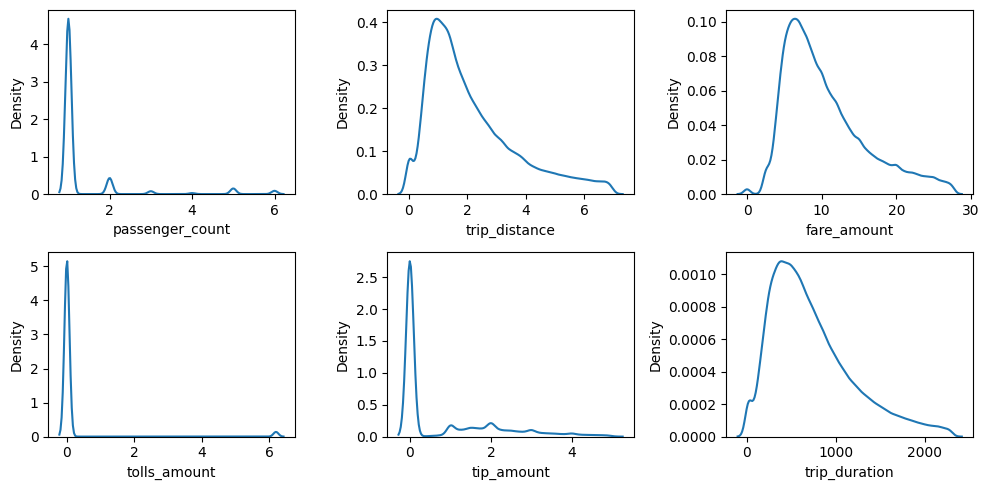

In [230]:
visualize_outliers_kde(imputed_df,["passenger_count","trip_distance","fare_amount","tolls_amount","tip_amount","trip_duration"])

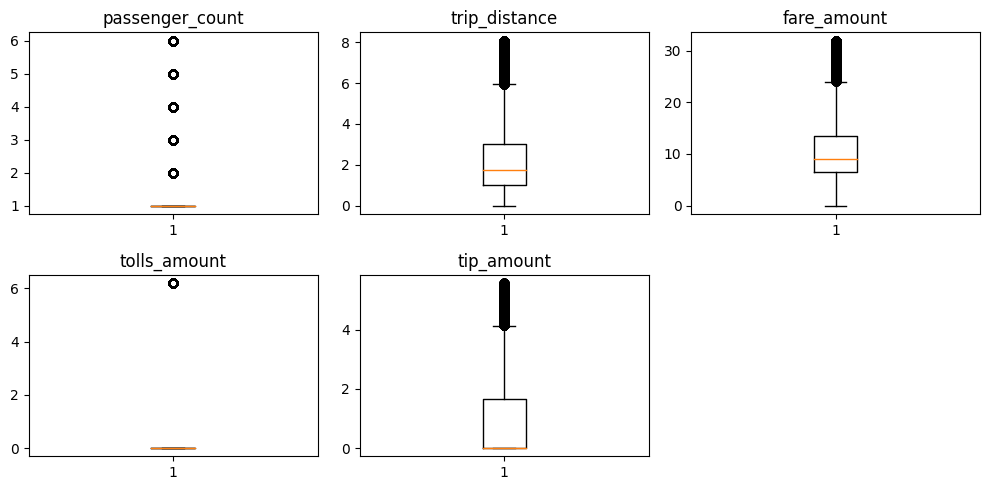

In [208]:
visualize_outliers_box(imputed_df,["passenger_count","trip_distance","fare_amount","tolls_amount","tip_amount"])

## Findings and conclusions

The following fields have undergone specific data handling methods:

- `trip_distance`: Outliers have been substituted with values that preserve the distribution of inlier data.

- `fare_amount`: Outliers have been replaced with values that maintain the distribution of inlier data.

- `tip_amount`: Outliers have been substituted with values that preserve the distribution of inlier data.

- `tolls_amount`: Using the Interquartile Range (IQR) method, any non-zero values are considered outliers and have been substituted with the mean of all non-zero values. This approach was chosen to prevent rendering the entire feature useless by having it consist solely of zeroes.

- `total_amount`: The `total_amount` field has been recalculated based on the updated values of `trip_distance`, `fare_amount`, `tip_amount`, and `tolls_amount`.

- `trip_duration`: Outliers in this field have been replaced with values that maintain the distribution of inlier data. Additionally, the `lpep_dropoff_datetime` has been recalculated based on the adjusted trip durations.

# 4 - Data transformation and feature eng.

## 4.1 - Discretization

In [209]:
transform_df = imputed_df.copy()

In [210]:
def discretise_dates(df):
    df_copy = df.copy()
    min_date = df_copy.lpep_pickup_datetime.min().date() - dt.timedelta(days=1)
    max_date = df_copy.lpep_dropoff_datetime.max().date() + dt.timedelta(days=1)
    numberOfWeeks = math.ceil((max_date - min_date).days / 7)
    dateBins = pd.DatetimeIndex([min_date + dt.timedelta(weeks = i) for i in range(numberOfWeeks+1)])
    binLabels = [i+1 for i in range(len(dateBins)-1)]
    df_copy["week_number"] =  pd.cut(x = df_copy.lpep_pickup_datetime, 
                                    bins=dateBins, labels=binLabels, include_lowest=False)
    df_copy["date_range"] = pd.cut(x = df_copy.lpep_pickup_datetime, 
                                     bins=dateBins, include_lowest=False)
    return df_copy


In [211]:
transform_df = discretise_dates(transform_df)
transform_df

vendor lpep_pickup_datetime  \
0                           VeriFone Inc.  2019-08-01 00:22:12   
1                           VeriFone Inc.  2019-08-01 00:11:35   
2                           VeriFone Inc.  2019-08-01 00:56:09   
3                           VeriFone Inc.  2019-08-01 00:11:44   
4       Creative Mobile Technologies, LLC  2019-08-01 00:20:34   
...                                   ...                  ...   
449695                      VeriFone Inc.  2019-08-01 00:10:53   
449696                      VeriFone Inc.  2019-08-01 00:31:22   
449697                      VeriFone Inc.  2019-08-01 00:50:24   
449698                      VeriFone Inc.  2019-08-01 00:27:06   
449699                      VeriFone Inc.  2019-08-01 00:43:23   

       lpep_dropoff_datetime store_and_fwd_flag      rate_type  \
0        2019-08-01 00:22:38                  N  Standard rate   
1        2019-08-01 00:25:53                  N  Standard rate   
2        2019-08-01 01:12:02                  N  Standard rate   
3        2019-08-31 23:59:42                  N  Standard rate   
4        2019-08-01 00:28:44                  N  Standard rate   
...                      ...                ...            ...   
449695   2019-08-01 00:23:46                  N  Standard rate   
449696   2019-08-01 00:44:37                  N  Standard rate   
449697   2019-08-01 01:03:20                  N  Standard rate   
449698   2019-08-01 00:33:22                  N  Standard rate   
449699   2019-08-01 00:59:54                  N  Standard rate   

                                  pu_location  \
0       Queens,Long Island City/Hunters Point   
1                 Brooklyn,DUMBO/Vinegar Hill   
2        Brooklyn,Downtown Brooklyn/MetroTech   
3                        Brooklyn,Boerum Hill   
4                 Manhattan,East Harlem South   
...                                       ...   
449695   Brooklyn,Downtown Brooklyn/MetroTech   
449696                   Brooklyn,Fort Greene   
449697                Brooklyn,Bushwick South   
449698  Queens,Long Island City/Hunters Point   
449699                    Brooklyn,Greenpoint   

                                  do_location  passenger_count  trip_distance  \
0       Queens,Long Island City/Hunters Point              1.0           0.00   
1                       Brooklyn,Clinton Hill              5.0           2.55   
2                      Manhattan,East Chelsea              1.0           4.33   
3                         Brooklyn,Kensington              1.0           3.85   
4                    Manhattan,Yorkville West              1.0           1.30   
...                                       ...              ...            ...   
449695              Brooklyn,Prospect Heights              5.0           2.00   
449696            Brooklyn,Stuyvesant Heights              5.0           3.20   
449697           Brooklyn,Crown Heights North              5.0           2.99   
449698                    Brooklyn,Greenpoint              1.0           1.73   
449699                       Queens,Ridgewood              1.0           3.42   

        fare_amount  ...  pickup_day  dropoff_date  dropoff_time  \
0               2.5  ...    Thursday    2019-08-01      00:22:38   
1              11.5  ...    Thursday    2019-08-01      00:25:53   
2              15.5  ...    Thursday    2019-08-01      01:12:02   
3              13.0  ...   Wednesday    2019-08-01      00:11:44   
4               7.5  ...    Thursday    2019-08-01      00:28:44   
...             ...  ...         ...           ...           ...   
449695         10.5  ...      Sunday    2019-09-01      00:23:46   
449696         12.0  ...      Sunday    2019-09-01      00:44:37   
449697         12.0  ...      Sunday    2019-09-01      01:03:20   
449698          7.5  ...      Sunday    2019-09-01      00:33:22   
449699         14.0  ...      Sunday    2019-09-01      00:59:54   

        dropoff_hour  dropoff_day    PU_area    DO_area trip_duration 

## 4.11 - Findings and conclusions

- Having discretised the `lpep_pickup_datetime` and `lpep_dropoff_datetime` features by week and date range , this cause a bit in loss of information the details of which day of the week the trip took place and what time during the day. While this might be acceptable for some analysis needs, further more providing any ML learning model or analysis critatria might have some strange results 

## 4.2 - Encoding

In [212]:
def label_encode(feature :Series, lookup_table=None):
    feature_copy = feature.copy()
    label_encoder = pp.LabelEncoder().fit(feature_copy)
    feature_copy = label_encoder.fit_transform(feature_copy)
    if not (lookup_table is None):
        for label in label_encoder.classes_:
            lookup_entry = {}
            lookup_entry["column_name"] = feature.name
            lookup_entry["original_value"] = label
            lookup_entry["encoded_value"] = label_encoder.transform([label])[0]
            lookup_table.loc[len(lookup_table)] = lookup_entry
    return pd.Series(feature_copy)

def get_freq_Values(series, count):
    return [x for x in series.value_counts().sort_values(ascending=False).head(count).index]

def oneHotEncode(df, col, freqLabels):
    dfCopy = df.copy()
    for label in freqLabels:
        dfCopy[col + '_' + label.lower()] = np.where(dfCopy[col] == label, True, False)
    return dfCopy

In [213]:
transform_df = pd.get_dummies(transform_df, columns=["mta_tax","ehail_fee","improvement_surcharge"], drop_first=True)

transform_df = oneHotEncode(transform_df, "rate_type", get_freq_Values(transform_df.rate_type, 3))
transform_df.store_and_fwd_flag = label_encode(transform_df.store_and_fwd_flag, LOOKUP)
transform_df.vendor = label_encode(transform_df.vendor, LOOKUP)
transform_df.trip_type = label_encode(transform_df.trip_type, LOOKUP)
transform_df.payment_type = label_encode(transform_df.payment_type, LOOKUP)

clean_column_names(transform_df)
transform_df

Index(['vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'rate_type', 'pu_location', 'do_location',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra',
       'tip_amount', 'tolls_amount', 'total_amount', 'payment_type',
       'trip_type', 'congestion_surcharge', 'pickup_date', 'pickup_time',
       'pickup_hour', 'pickup_day', 'dropoff_date', 'dropoff_time',
       'dropoff_hour', 'dropoff_day', 'PU_area', 'DO_area', 'trip_duration',
       'week_number', 'date_range', 'mta_tax_0.5', 'ehail_fee_1.95',
       'improvement_surcharge_0.3', 'rate_type_standard rate',
       'rate_type_negotiated fare', 'rate_type_jfk'],
      dtype='object')
Index(['vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'rate_type', 'pu_location', 'do_location',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra',
       'tip_amount', 'tolls_amount', 'total_amount', 'payment_type',
       'trip_type', 'cong

vendor lpep_pickup_datetime lpep_dropoff_datetime  store_and_fwd_flag  \
0          1.0  2019-08-01 00:22:12   2019-08-01 00:22:38                 0.0   
1          1.0  2019-08-01 00:11:35   2019-08-01 00:25:53                 0.0   
2          1.0  2019-08-01 00:56:09   2019-08-01 01:12:02                 0.0   
3          1.0  2019-08-01 00:11:44   2019-08-31 23:59:42                 0.0   
4          0.0  2019-08-01 00:20:34   2019-08-01 00:28:44                 0.0   
...        ...                  ...                   ...                 ...   
449695     NaN  2019-08-01 00:10:53   2019-08-01 00:23:46                 NaN   
449696     NaN  2019-08-01 00:31:22   2019-08-01 00:44:37                 NaN   
449697     NaN  2019-08-01 00:50:24   2019-08-01 01:03:20                 NaN   
449698     NaN  2019-08-01 00:27:06   2019-08-01 00:33:22                 NaN   
449699     NaN  2019-08-01 00:43:23   2019-08-01 00:59:54                 NaN   

            rate_type                            pu_location  \
0       Standard rate  Queens,Long Island City/Hunters Point   
1       Standard rate            Brooklyn,DUMBO/Vinegar Hill   
2       Standard rate   Brooklyn,Downtown Brooklyn/MetroTech   
3       Standard rate                   Brooklyn,Boerum Hill   
4       Standard rate            Manhattan,East Harlem South   
...               ...                                    ...   
449695  Standard rate   Brooklyn,Downtown Brooklyn/MetroTech   
449696  Standard rate                   Brooklyn,Fort Greene   
449697  Standard rate                Brooklyn,Bushwick South   
449698  Standard rate  Queens,Long Island City/Hunters Point   
449699  Standard rate                    Brooklyn,Greenpoint   

                                  do_location  passenger_count  trip_distance  \
0       Queens,Long Island City/Hunters Point              1.0           0.00   
1                       Brooklyn,Clinton Hill              5.0           2.55   
2                      Manhattan,East Chelsea              1.0           4.33   
3                         Brooklyn,Kensington              1.0           3.85   
4                    Manhattan,Yorkville West              1.0           1.30   
...                                       ...              ...            ...   
449695              Brooklyn,Prospect Heights              5.0           2.00   
449696            Brooklyn,Stuyvesant Heights              5.0           3.20   
449697           Brooklyn,Crown Heights North              5.0           2.99   
449698                    Brooklyn,Greenpoint              1.0           1.73   
449699                       Queens,Ridgewood              1.0           3.42   

        fare_amount  ...    do_area  trip_duration  week_number  \
0               2.5  ...     Queens           26.0            1   
1              11.5  ...   Brooklyn          858.0            1   
2              15.5  ...  Manhattan          953.0            1   
3              13.0  ...   Brooklyn      2677678.0            1   
4               7.5  ...  Manhattan          490.0            1   
...             ...  ...        ...            ...          ...   
449695         10.5  ...   Brooklyn          773.0            1   
449696         12.0  ...   Brooklyn          795.0            1   
449697         12.0  ...   Brooklyn          776.0            1   
449698          7.5  ...   Brooklyn          376.0            1   
449699         14.0  ...     Queens          991.0            1   

                      date_range  mta_tax_0.5  ehail_fee_1.95  \
0       (2019-07-31, 2019-08-07]         True           False   
1       (2019-07-31, 2019-08-07]         True           False   
2       (2019-07-31, 2019-08-07]         True           False   
3       (2019-07-31, 2019-08-07]         True           False   
4       (2019-07-31, 2019-08-07]         True           False   
...                          ...          ...             ...   
449695  (2019-07-31, 2019-08-07] 

## 4.22 - Findings and conlcusions

- The encoding techniques used were One-Hot Encoding (used in two different ways) and Label Encoding. 

- One-Hot Encoding was applied to the features `mta_tax`, `ehail_fee`, and `improvement_surcharge` due to their limited unique values, ensuring a manageable number of new columns.
one one hot encoded column for each is created as knowing the value of that column tells that that value isnot zero.
- The `rate_type` column was one-hot encoded, but only for the three most common values, as they collectively covered over 99% of the dataset. The original `rate_type` column was retained to capture the value if neither of the encoded columns was True.
- The `store_and_fwd_flag` was Label Encoded, as it represents a simple boolean variable.
- The `vendor`, `trip_type`, and `payment_type` columns were Label Encoded to prevent the addition of redundant columns and avoid unnecessary dataset size increase.

## 4.3 - Normalisation 

<Axes: xlabel='trip_duration', ylabel='Density'>

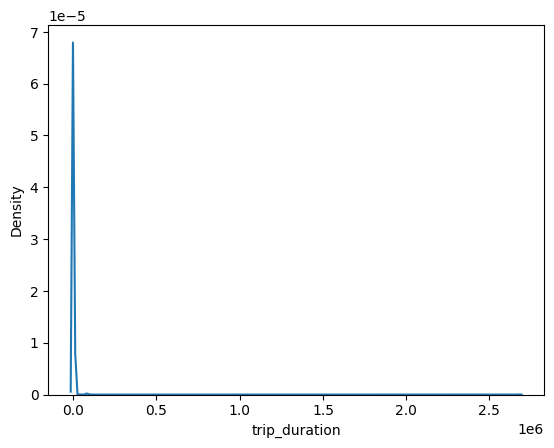

In [214]:
sns.kdeplot(imputed_df.trip_duration)

In [231]:
transform_df.trip_duration = stats.boxcox(imputed_df.trip_duration)[0]
sns.kdeplot(transform_df.trip_duration)

ValueError: Length of values (389443) does not match length of index (389563)

## 4.31 - Findings and conclusions

- The trip_duration feature should Underwent normalization to mitigate its dependency on the initially chosen unit of seconds. Given that this feature consists of positive values, a Box-Cox transformation is a suitable method for achieving this, as it concurrently addresses skewness, unlike a linear transformation.

- 'total_amount' was intentionally retained in its original numerical form to preserve actual monetary values, which is essential for addressing specific business analysis questions related to monetary gains.
- The other monetary features were left unnormalized to maintain their inherent association with 'total_amount,' representing the aggregate of these monetary aspects. This decision aimed to preserve the natural relationships between these variables without altering their scales.
- Features like 'passenger_count,' 'store_and_fwd,' and 'mta_tax' were exempt from normalization due to their categorical nature, as normalizing such variables wouldn't be meaningful in their respective contexts.

## 4.4 - Adding more features(feature eng.)

In [216]:
def add_is_weekend_column(df):
    # Map days of the week to a binary 'isWeekend' column
    df_copy = df.copy()
    df_copy['isWeekend'] = df_copy['pickup_day'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
    return df_copy
transform_df = add_is_weekend_column(transform_df)
transform_df

vendor lpep_pickup_datetime lpep_dropoff_datetime  store_and_fwd_flag  \
0          1.0  2019-08-01 00:22:12   2019-08-01 00:22:38                 0.0   
1          1.0  2019-08-01 00:11:35   2019-08-01 00:25:53                 0.0   
2          1.0  2019-08-01 00:56:09   2019-08-01 01:12:02                 0.0   
3          1.0  2019-08-01 00:11:44   2019-08-31 23:59:42                 0.0   
4          0.0  2019-08-01 00:20:34   2019-08-01 00:28:44                 0.0   
...        ...                  ...                   ...                 ...   
449695     NaN  2019-08-01 00:10:53   2019-08-01 00:23:46                 NaN   
449696     NaN  2019-08-01 00:31:22   2019-08-01 00:44:37                 NaN   
449697     NaN  2019-08-01 00:50:24   2019-08-01 01:03:20                 NaN   
449698     NaN  2019-08-01 00:27:06   2019-08-01 00:33:22                 NaN   
449699     NaN  2019-08-01 00:43:23   2019-08-01 00:59:54                 NaN   

            rate_type                            pu_location  \
0       Standard rate  Queens,Long Island City/Hunters Point   
1       Standard rate            Brooklyn,DUMBO/Vinegar Hill   
2       Standard rate   Brooklyn,Downtown Brooklyn/MetroTech   
3       Standard rate                   Brooklyn,Boerum Hill   
4       Standard rate            Manhattan,East Harlem South   
...               ...                                    ...   
449695  Standard rate   Brooklyn,Downtown Brooklyn/MetroTech   
449696  Standard rate                   Brooklyn,Fort Greene   
449697  Standard rate                Brooklyn,Bushwick South   
449698  Standard rate  Queens,Long Island City/Hunters Point   
449699  Standard rate                    Brooklyn,Greenpoint   

                                  do_location  passenger_count  trip_distance  \
0       Queens,Long Island City/Hunters Point              1.0           0.00   
1                       Brooklyn,Clinton Hill              5.0           2.55   
2                      Manhattan,East Chelsea              1.0           4.33   
3                         Brooklyn,Kensington              1.0           3.85   
4                    Manhattan,Yorkville West              1.0           1.30   
...                                       ...              ...            ...   
449695              Brooklyn,Prospect Heights              5.0           2.00   
449696            Brooklyn,Stuyvesant Heights              5.0           3.20   
449697           Brooklyn,Crown Heights North              5.0           2.99   
449698                    Brooklyn,Greenpoint              1.0           1.73   
449699                       Queens,Ridgewood              1.0           3.42   

        fare_amount  ...  trip_duration  week_number  \
0               2.5  ...       3.383491            1   
1              11.5  ...       7.308510            1   
2              15.5  ...       7.431351            1   
3              13.0  ...      17.636744            1   
4               7.5  ...       6.658194            1   
...             ...  ...            ...          ...   
449695         10.5  ...       7.186766            1   
449696         12.0  ...       7.219486            1   
449697         12.0  ...       7.191281            1   
449698          7.5  ...       6.353687            1   
449699         14.0  ...       7.477165            1   

                      date_range  mta_tax_0.5  ehail_fee_1.95  \
0       (2019-07-31, 2019-08-07]         True           False   
1       (2019-07-31, 2019-08-07]         True           False   
2       (2019-07-31, 2019-08-07]         True           False   
3       (2019-07-31, 2019-08-07]         True           False   
4       (2019-07-31, 2019-08-07]         True           False   
...                          ...          ...             ...   
449695  (2019-07-31, 2019-08-07]         True           False   
449696  (2019-07-31, 2019-08-07]         True           False   
449697  (2019-07-31, 2019-08-07]   

In [217]:
transform_df.isWeekend.value_counts()

isWeekend
0    279745
1    109818
Name: count, dtype: int64

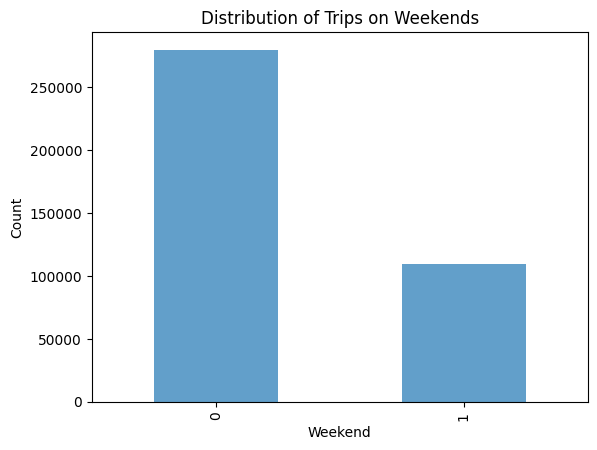

In [218]:
is_weekend_counts = transform_df['isWeekend'].value_counts()
is_weekend_counts.plot(kind='bar', alpha=0.7)

# Adding labels and a title
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.title('Distribution of Trips on Weekends')
plt.show()

## 4.41 - Findings and concluisons

Added two new features:

- `trip_duration`: this feature was introduced during the data cleaning phase and After detailed analysis and cleaning during the cleaning phase, this feature provides insights into trip duration.
- `is_weekend`: Identifies whether a trip occurred on a weekend (Saturday or Sunday).
Demonstrated that most trips take place on weekdays, supporting the idea that our service is commonly used for daily work commuting.

Introduced four more features:

- `pickup/dropoff area`: Provides information on the locations of pickups and drop-offs.
- `pickup/dropoff time`: Offers details about the timing of trips.
These new features enhance our dataset for better analysis and predictive modeling, helping us understand customer behavior and trip characteristics more effectively. They will be valuable for data-driven decision-making in our cab service.

## 4.5 - Additional data extraction (GPS coordinates)

In [219]:
def extract_first_two_elements(series,df):
    # Split each element by comma and extract the first two elements
    extracted_data = series.str.split(',', n=1).str[:2]
    
    # Combine the first two elements into a single string
    combined_data = extracted_data.str.join(', ')
    series_name = series.name +"_boroughs"
    df[series_name] = combined_data
    # Get unique values
    unique_combined_data = combined_data.unique()
    
    return unique_combined_data

def get_borough_coordinates(api_key, series,df ,csv_filename='coordinates.csv'):
    # Check if the CSV file already exists
    boroughs = extract_first_two_elements(series,df)
    if os.path.exists(csv_filename):
        print(f"{csv_filename} already exists. Returning existing data.")
        return pd.read_csv(csv_filename)
    base_url = "http://api.positionstack.com/v1/forward"
    coordinates = []
    for borough in boroughs:
        params = {
            "access_key": api_key,
            "query": borough
        }
        response = requests.get(base_url, params=params)
        data = response.json()
        if response.status_code == 200 and data.get('data'):
            location = data['data'][0]
            lat = location['latitude']
            lng = location['longitude']
            coordinates.append((borough, lat, lng))
    if coordinates:
        # Save the data to a CSV file
        with open(csv_filename, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Borough", "Latitude", "Longitude"])  # Write header
            for borough, lat, lng in coordinates:
                writer.writerow([borough, lat, lng])
        
        print(f"Data saved to {csv_filename}")
        return pd.read_csv(csv_filename)
    else:
        print("No data retrieved. CSV file not created.")
    return 

In [220]:
# positionstack api is used please provide ur api key below
api_key = 'Add ur api key here'
coor_pickup =get_borough_coordinates(api_key,transform_df.pu_location,transform_df,csv_filename='coordinates_pickup.csv')

coordinates_pickup.csv already exists. Returning existing data.


In [221]:
coor_dropoff = get_borough_coordinates(api_key,transform_df.do_location,transform_df,csv_filename='coordinates_dropoff.csv')

coordinates_dropoff.csv already exists. Returning existing data.


In [222]:
def add_coordinates(df, borough_column, coordinates_df,col_name):
    # Create dictionaries mapping boroughs to their respective coordinates
    borough_to_lat = dict(zip(coordinates_df['Borough'], coordinates_df['Latitude']))
    borough_to_long = dict(zip(coordinates_df['Borough'], coordinates_df['Longitude']))
    
    # Map the values using the dictionaries
    df[col_name+'_latitude'] = df[borough_column].map(borough_to_lat)
    df[col_name+'_longitude'] = df[borough_column].map(borough_to_long)
    
    return df

In [223]:
transform_df = add_coordinates(transform_df, 'pu_location_boroughs', coor_pickup,"pu")
transform_df = add_coordinates(transform_df, 'do_location_boroughs', coor_pickup,"do")

In [224]:
transform_df

vendor lpep_pickup_datetime lpep_dropoff_datetime  store_and_fwd_flag  \
0          1.0  2019-08-01 00:22:12   2019-08-01 00:22:38                 0.0   
1          1.0  2019-08-01 00:11:35   2019-08-01 00:25:53                 0.0   
2          1.0  2019-08-01 00:56:09   2019-08-01 01:12:02                 0.0   
3          1.0  2019-08-01 00:11:44   2019-08-31 23:59:42                 0.0   
4          0.0  2019-08-01 00:20:34   2019-08-01 00:28:44                 0.0   
...        ...                  ...                   ...                 ...   
449695     NaN  2019-08-01 00:10:53   2019-08-01 00:23:46                 NaN   
449696     NaN  2019-08-01 00:31:22   2019-08-01 00:44:37                 NaN   
449697     NaN  2019-08-01 00:50:24   2019-08-01 01:03:20                 NaN   
449698     NaN  2019-08-01 00:27:06   2019-08-01 00:33:22                 NaN   
449699     NaN  2019-08-01 00:43:23   2019-08-01 00:59:54                 NaN   

            rate_type                            pu_location  \
0       Standard rate  Queens,Long Island City/Hunters Point   
1       Standard rate            Brooklyn,DUMBO/Vinegar Hill   
2       Standard rate   Brooklyn,Downtown Brooklyn/MetroTech   
3       Standard rate                   Brooklyn,Boerum Hill   
4       Standard rate            Manhattan,East Harlem South   
...               ...                                    ...   
449695  Standard rate   Brooklyn,Downtown Brooklyn/MetroTech   
449696  Standard rate                   Brooklyn,Fort Greene   
449697  Standard rate                Brooklyn,Bushwick South   
449698  Standard rate  Queens,Long Island City/Hunters Point   
449699  Standard rate                    Brooklyn,Greenpoint   

                                  do_location  passenger_count  trip_distance  \
0       Queens,Long Island City/Hunters Point              1.0           0.00   
1                       Brooklyn,Clinton Hill              5.0           2.55   
2                      Manhattan,East Chelsea              1.0           4.33   
3                         Brooklyn,Kensington              1.0           3.85   
4                    Manhattan,Yorkville West              1.0           1.30   
...                                       ...              ...            ...   
449695              Brooklyn,Prospect Heights              5.0           2.00   
449696            Brooklyn,Stuyvesant Heights              5.0           3.20   
449697           Brooklyn,Crown Heights North              5.0           2.99   
449698                    Brooklyn,Greenpoint              1.0           1.73   
449699                       Queens,Ridgewood              1.0           3.42   

        fare_amount  ...  rate_type_standard_rate  rate_type_negotiated_fare  \
0               2.5  ...                     True                      False   
1              11.5  ...                     True                      False   
2              15.5  ...                     True                      False   
3              13.0  ...                     True                      False   
4               7.5  ...                     True                      False   
...             ...  ...                      ...                        ...   
449695         10.5  ...                     True                      False   
449696         12.0  ...                     True                      False   
449697         12.0  ...                     True                      False   
449698          7.5  ...                     True                      False   
449699         14.0  ...                     True                      False   

        rate_type_jfk  isWeekend                    pu_location_boroughs  \
0               False          0  Queens, Long Island City/Hunters Point   
1               False          0            Brooklyn, DUMBO/Vinegar Hill   
2               False          0   Brooklyn, Downtown Brooklyn/MetroTech   
3               False       

## 4.6 - Csv file for lookup

In [225]:
LOOKUP

column_name                     original_value  encoded_value  \
0           payment_type                             Uknown            NaN   
1              rate_type                            Unknown            NaN   
2            pu_location                    Unknown,Unknown            NaN   
3            do_location                    Unknown,Unknown            NaN   
4            pu_location                         Unknown,NV            NaN   
5            do_location                         Unknown,NV            NaN   
6              trip_type                            Unknown            NaN   
7           payment_type                            Unknown            NaN   
8        passenger_count                                NAN            NaN   
9     store_and_fwd_flag                                NAN            NaN   
10  congestion_surcharge                                NAN            NaN   
11                 extra                                NAN            NaN   
12             ehail_fee                                NAN            NaN   
13    store_and_fwd_flag                                  N            0.0   
14    store_and_fwd_flag                                  Y            1.0   
15                vendor  Creative Mobile Technologies, LLC            0.0   
16                vendor                      VeriFone Inc.            1.0   
17             trip_type                           Dispatch            0.0   
18             trip_type                        Street-hail            1.0   
19          payment_type                               Cash            0.0   
20          payment_type                        Credit card            1.0   
21          payment_type                            Dispute            2.0   
22          payment_type                          No charge            3.0   

                                        imputed_value  
0   imputed by the Mode Credit card of payment_typ...  
1                                       Standard rate  
2                                Imputed By Frequency  
3                                Imputed By Frequency  
4                        Imputed like 'Unkown,Unkown'  
5                        Imputed like 'Unkown,Unkown'  
6                                         Street-hail  
7   imputed by the Mode Credit card of payment_typ...  
8    imputed by the Mode 2.0 of passenger_count =None  
9                                Imputed By Frequency  
10                                                0.0  
11                                                  0  
12                                                0.0  
13                                                NaN  
14                                                NaN  
15                                                NaN  
16                                                NaN  
17                                                NaN  
18                                                NaN  
19                                                NaN  
20                                                NaN  
21                                                NaN  
22                                                NaN

In [226]:
LOOKUP.to_csv("lookup_table_green_taxis.csv")

## 5- Exporting the dataframe to a csv file or parquet

In [227]:
transform_df.to_csv("green_trip_data_2019-8_clean.csv")